2.16.1
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


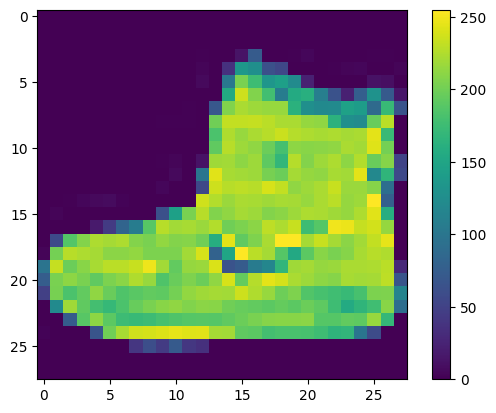

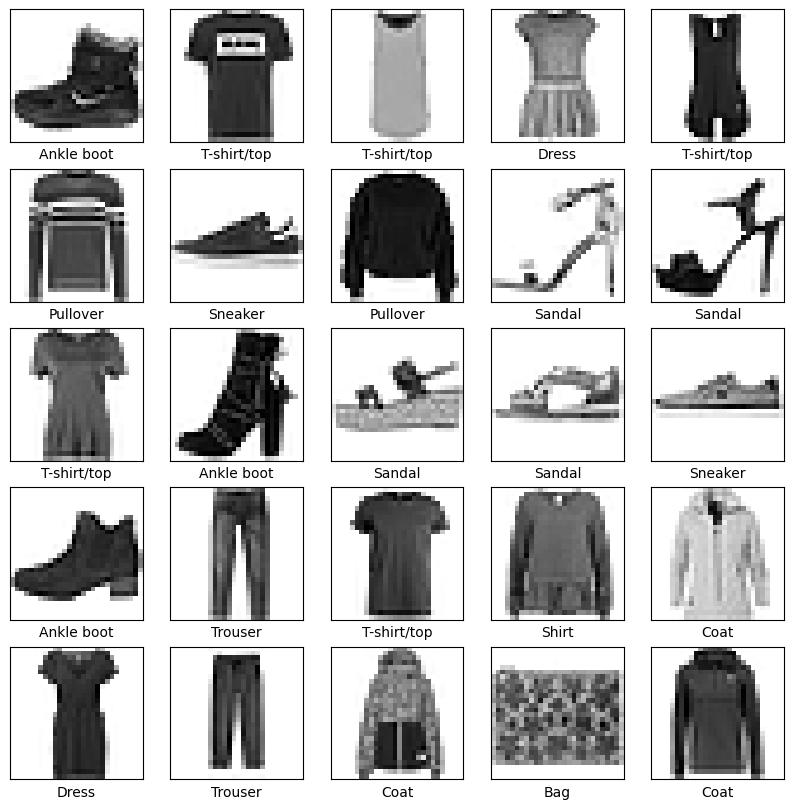

Epoch 1/10


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7800 - loss: 0.6239
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8607 - loss: 0.3871
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8736 - loss: 0.3446
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8855 - loss: 0.3117
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8916 - loss: 0.2927
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8950 - loss: 0.2822
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8997 - loss: 0.2690
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9042 - loss: 0.2580
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9075 - loss: 0.2467
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9119 - loss: 0.2369
313/313 - 0s - 465us/step - accuracy: 0.8808 - loss: 0.3332

Test accuracy: 0.8808000087738037
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 359

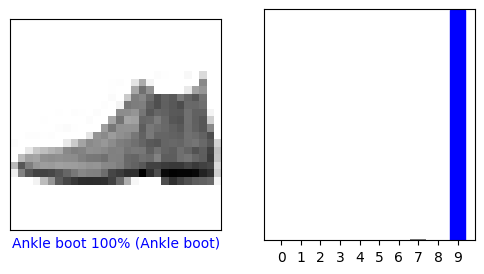

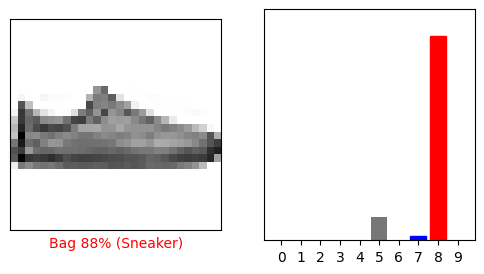

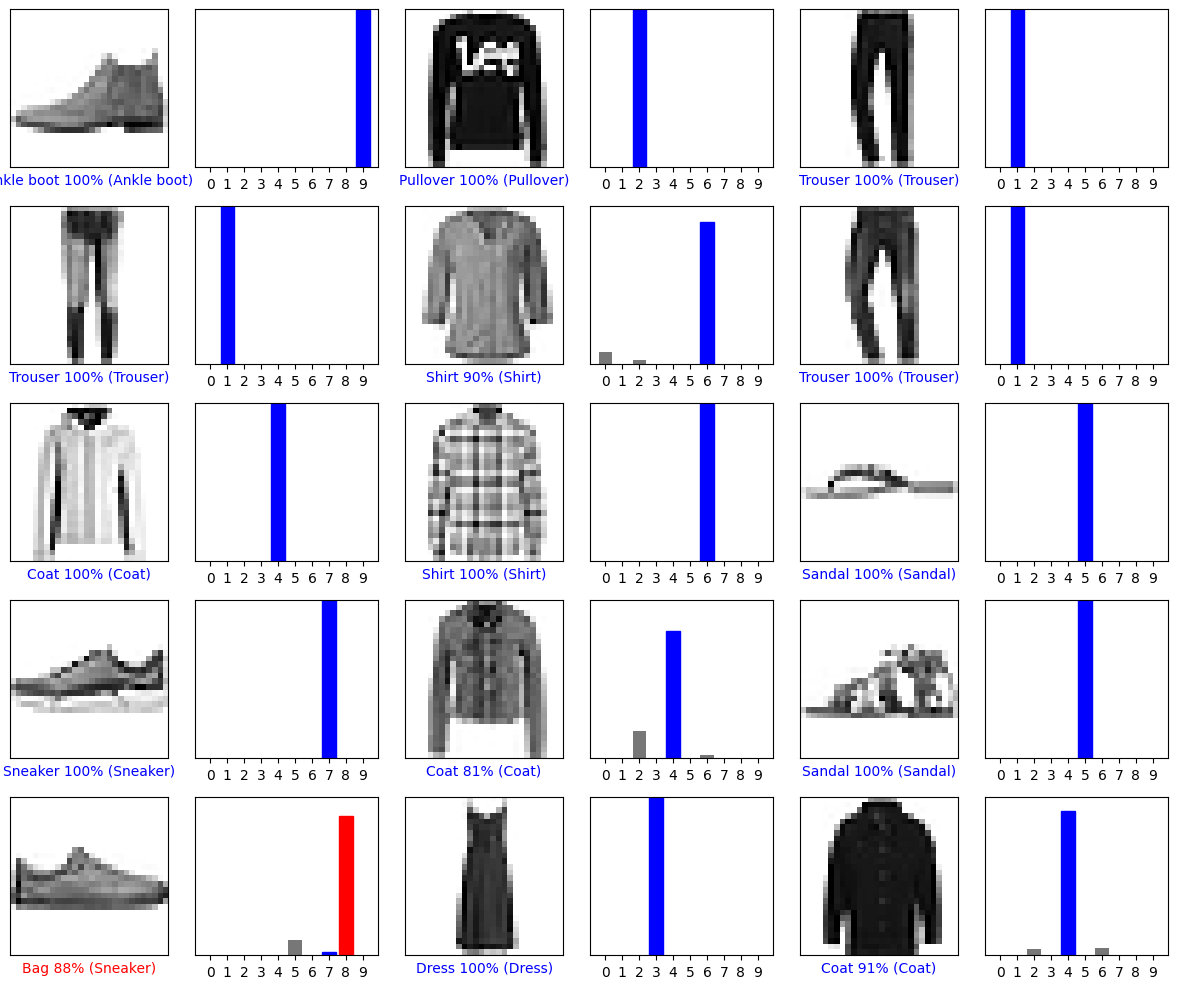

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[1.8773886e-04 1.0212849e-10 9.9798977e-01 7.9079072e-08 1.3384381e-03
  8.0118000e-15 4.8395060e-04 4.2106727e-18 1.4545075e-09 1.3034396e-12]]


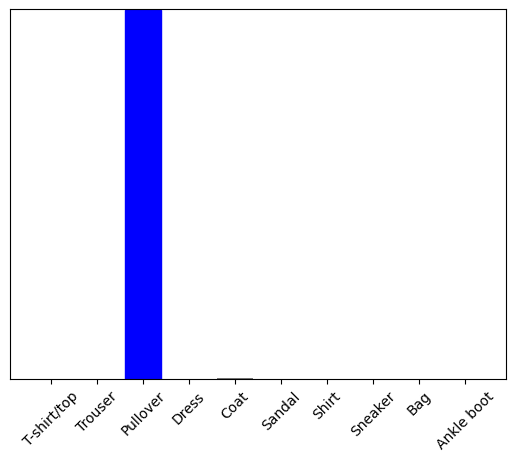

2


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 15 19:00:33 2022
@credits: https://www.tensorflow.org/tutorials/keras/classification
"""

# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
print(np.argmax(predictions_single[0]))


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape input data to add a channel dimension (required for Conv2D layers)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print(test_acc)

Epoch 1/10


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6719 - loss: 0.9093 - val_accuracy: 0.8452 - val_loss: 0.4216
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8431 - loss: 0.4497 - val_accuracy: 0.8783 - val_loss: 0.3379
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8698 - loss: 0.3676 - val_accuracy: 0.8783 - val_loss: 0.3216
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8882 - loss: 0.3170 - val_accuracy: 0.8937 - val_loss: 0.2963
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8962 - loss: 0.2951 - val_accuracy: 0.8989 - val_loss: 0.2839
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9024 - loss: 0.2780 - val_accuracy: 0.9010 - val_loss: 0.2736
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9092 - loss: 0.2566 - val_accuracy: 0.9022 - val_loss: 0.2839
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9136 - loss: 0.2404 

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

tf.random.set_seed(42)
np.random.seed(42)

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape input data to add a channel dimension (required for Conv2D layers)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6739 - loss: 0.9072 - val_accuracy: 0.8560 - val_loss: 0.3982
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8445 - loss: 0.4411 - val_accuracy: 0.8799 - val_loss: 0.3346
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8719 - loss: 0.3700 - val_accuracy: 0.8878 - val_loss: 0.3064
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8841 - loss: 0.3291 - val_accuracy: 0.8981 - val_loss: 0.2870
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8929 - loss: 0.2976 - val_accuracy: 0.9017 - val_loss: 0.2747
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9027 - loss: 0.2773 - val_accuracy: 0.9028 - val_loss: 0.2724
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9075 - loss: 0.2578 - val_accuracy: 0.9050 - val_loss: 0.2773
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9101 - l

In [5]:
from re import I, X
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

class_labels = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot",]

plt.figure(figsize = (16,16))

X_train_dim = np.expand_dims(X_train, -1)
X_test_dim = np.expand_dims(X_test, -1)

X_train_scale = X_train_dim / 255
X_test_scale = X_test_dim / 255

X_train_model, X_val_model, y_train_model, y_val_model = train_test_split(X_train_scale, y_train, test_size = 0.2, random_state = 2020)

cnn_model = keras.models.Sequential(
    [
        keras.layers.Conv2D(
            filters = 32,
            kernel_size = 3,
            strides = (1,1),
            padding = 'valid',
            activation = 'relu',
            input_shape = [28,28,1]   # 1 is for Black-White Image. 3 will be for RGB images.
        ),

        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units = 128, activation = 'relu'),
        keras.layers.Dense(units = 10, activation = 'softmax') # Output Layer
    ]
)

cnn_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnn_model.fit(X_train_model, y_train_model, epochs = 10, batch_size = 512, verbose = 1, validation_data=(X_val_model, y_val_model))


Epoch 1/10


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7026 - loss: 0.9050 - val_accuracy: 0.8478 - val_loss: 0.4380
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8567 - loss: 0.4077 - val_accuracy: 0.8634 - val_loss: 0.3958
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8769 - loss: 0.3553 - val_accuracy: 0.8778 - val_loss: 0.3572
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8859 - loss: 0.3226 - val_accuracy: 0.8855 - val_loss: 0.3312
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8952 - loss: 0.2980 - val_accuracy: 0.8922 - val_loss: 0.3132
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9028 - loss: 0.2791 - val_accuracy: 0.8968 - val_loss: 0.2990
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9084 - loss: 0.2634 - val_accuracy: 0.8989 - val_loss: 0.2928
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9116 - loss: 0.2516 - val_accuracy: 0.8998 - val_loss: 0.

<Figure size 1600x1600 with 0 Axes>

In [6]:
cnn_model.evaluate(X_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9059 - loss: 0.2818


[0.2808147370815277, 0.9018999934196472]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


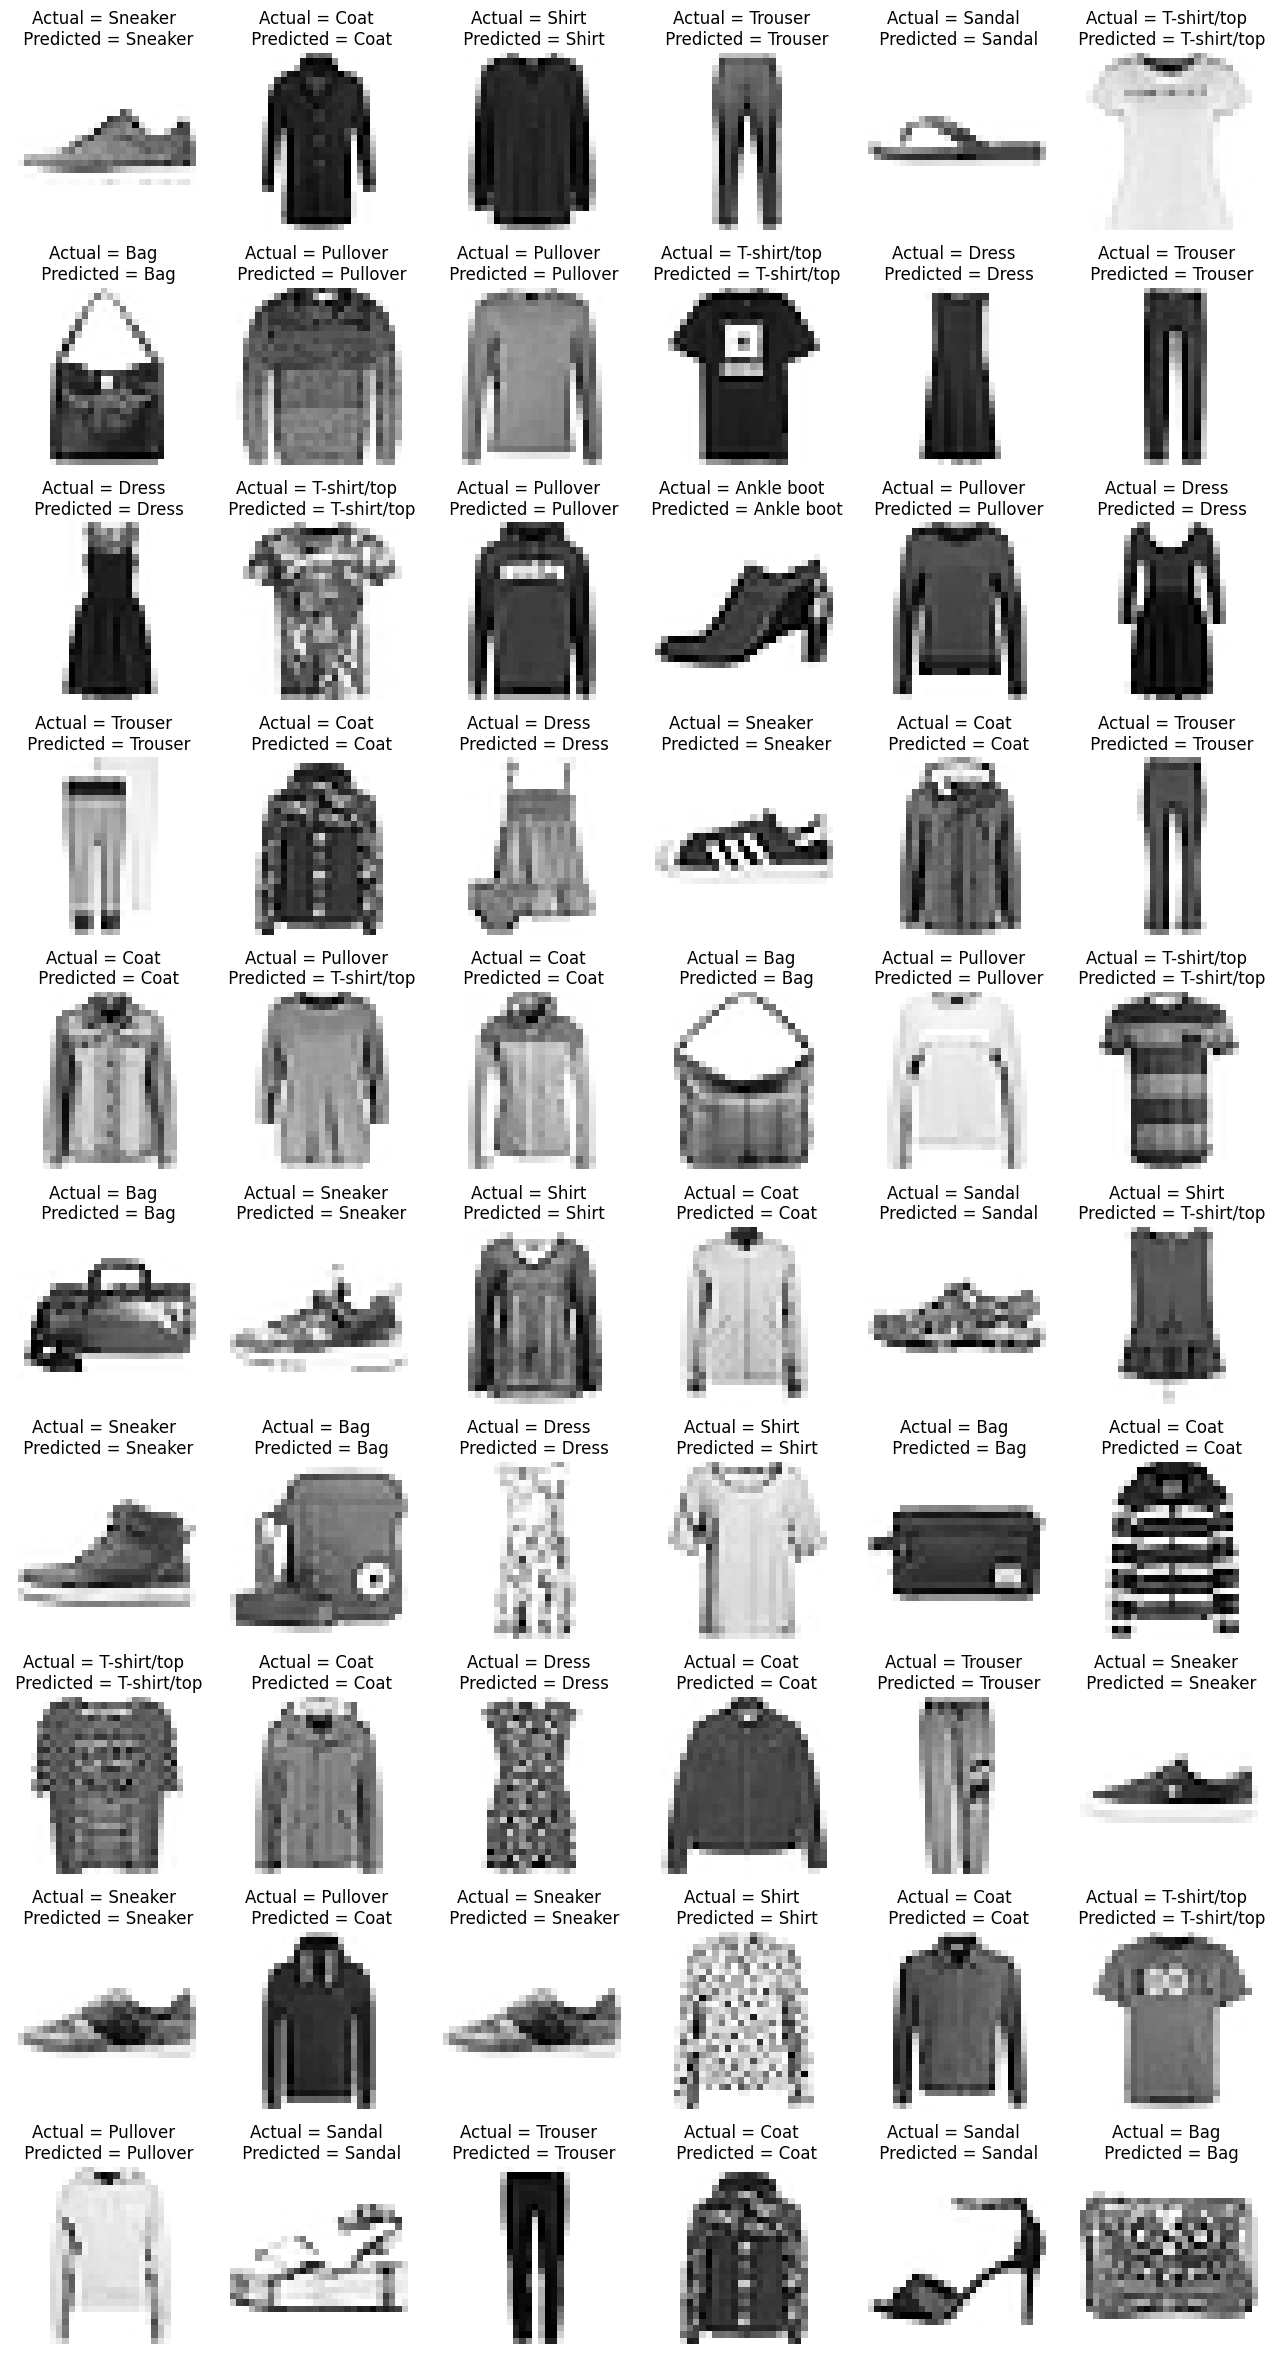

In [7]:
y_pred = cnn_model.predict(X_test_scale).round(2)

plt.figure(figsize = (16,30))

j = 1
for i in np.random.randint(0, 1000, 60):
    plt.subplot(10,6,j)
    j += 1
    plt.imshow(X_test_scale[i].reshape(28,28), cmap = 'Greys') # As we aer using the scaled dataset we have to reshape it back to 28*28.
#     plt.imshow(X_test[i], cmap = 'Greys')
    plt.axis('off')
    plt.title("Actual = {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]) )

<Axes: >

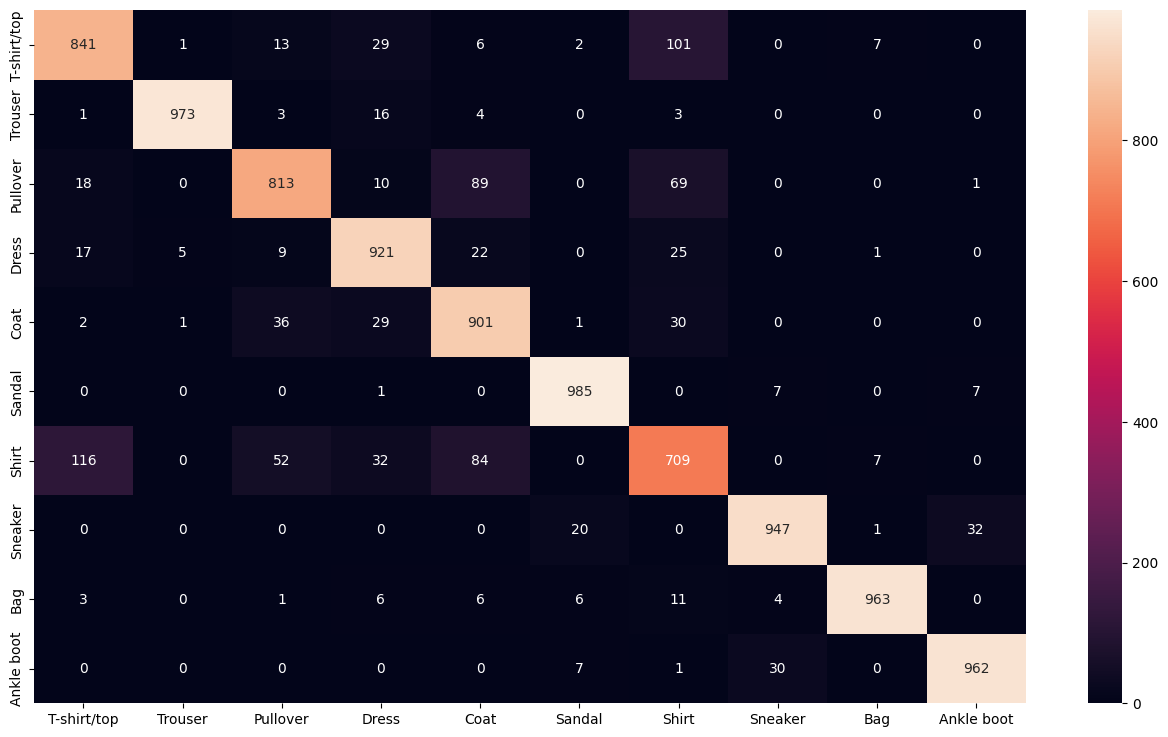

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, [np.argmax(i) for i in y_pred])

plt.figure(figsize = (16,9))
sns.heatmap(cm, annot = True, fmt = "d", xticklabels = class_labels, yticklabels = class_labels)

In [9]:
cnn_model2 = keras.models.Sequential(
    [
        keras.layers.Conv2D(
            filters = 32,
            kernel_size = 3,
            strides = (1,1),
            padding = 'valid',
            activation = 'relu',
            input_shape = [28,28,1]   # 1 is for Black-White Image. 3 will be for RGB images.
        ),

        keras.layers.MaxPooling2D(pool_size = (2,2)),

        keras.layers.Conv2D(
            filters = 64,
            kernel_size = 3,
            strides = (2,2),
            padding = 'same',
            activation = 'relu',
            input_shape = [28,28,1]   # 1 is for Black-White Image. 3 will be for RGB images.
        ),

        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units = 128, activation = 'relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(units = 256, activation = 'relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(units = 128, activation = 'relu'),
        keras.layers.Dense(units = 10, activation = 'softmax') # Output Layer
    ]
)

cnn_model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnn_model2.fit(X_train_model, y_train_model, epochs = 20, batch_size = 512, verbose = 1, validation_data=(X_val_model, y_val_model))

Epoch 1/20


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4751 - loss: 1.4554 - val_accuracy: 0.7835 - val_loss: 0.5721
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7821 - loss: 0.5822 - val_accuracy: 0.8327 - val_loss: 0.4546
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8262 - loss: 0.4730 - val_accuracy: 0.8493 - val_loss: 0.4060
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8469 - loss: 0.4152 - val_accuracy: 0.8687 - val_loss: 0.3574
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8636 - loss: 0.3748 - val_accuracy: 0.8768 - val_loss: 0.3316
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8751 - loss: 0.3481 - val_accuracy: 0.8824 - val_loss: 0.3202
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8796 - loss: 0.3263 - val_accuracy: 0.8887 - val_loss: 0.3016
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8876 - loss: 0.3076 - val_accuracy: 0.8888 - val_loss: 0.

In [10]:
cnn_model2.evaluate(X_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8935 - loss: 0.2942


[0.2861728370189667, 0.894599974155426]

In [13]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow import keras

def create_cnn2_model(dropout_rate=0.1, optimizer='adam'):
    model = keras.models.Sequential([
        keras.layers.Conv2D(
            filters=32,
            kernel_size=3,
            strides=(1, 1),
            padding='valid',
            activation='relu',
            input_shape=[28, 28, 1]
        ),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(
            filters=64,
            kernel_size=3,
            strides=(2, 2),
            padding='same',
            activation='relu'
        ),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(units=256, activation='relu'),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dense(units=10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

param_grid = dict(
    epochs=[10, 20, 30],
    batch_size=[512, 1024, 2048],
    dropout_rate=[0.1, 0.25, 0.5],
    optimizer = ['adam', 'rmsprop', 'sgd']
)

model = KerasClassifier(build_fn=create_cnn2_model, verbose=1, dropout_rate=0.1, optimizer='adam')

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train_model, y_train_model)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/U

Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.4501 - loss: 1.6192
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - accuracy: 0.4361 - loss: 1.6028
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.4458 - loss: 1.6140
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step - accuracy: 0.4205 - loss: 1.6290
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step - accuracy: 0.4283 - loss: 1.6019
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 212ms/step - accuracy: 0.4346 - loss: 1.6104
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - accuracy: 0.4506 - loss: 1.5598
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.4467 - loss: 1.6166
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - accuracy: 0.4349 - loss: 1.6159
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 218ms/step - accuracy: 0.4582 - loss: 1.5226
Epoch 2/20
63/63 ━━━━━━━━━━━━━━

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/U

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.8913 - loss: 0.2935Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.8912 - loss: 0.2935
Epoch 11/20
 1/63 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9004 - loss: 0.2622Epoch 1/20


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/U

 2/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9019 - loss: 0.2677Epoch 1/20
 3/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.8998 - loss: 0.2735Epoch 1/20
 5/63 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8993 - loss: 0.2770Epoch 1/20


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/U

 6/63 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8985 - loss: 0.2784Epoch 1/20
 7/63 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8978 - loss: 0.2799Epoch 1/20
 8/63 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8970 - loss: 0.2811Epoch 1/30
 9/63 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8963 - loss: 0.2823Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.8902 - loss: 0.2927
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.4372 - loss: 1.5704
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 204ms/step - accuracy: 0.4025 - loss: 1.6028
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 208ms/step - accuracy: 0.4660 - loss: 1.5525
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.4711 - loss: 1.5788
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.4565 - loss: 1.5817
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - accuracy: 0.4552 - loss: 1.6166
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - accuracy: 0

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.8922 - loss: 0.2942
Epoch 11/20
 3/63 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.8758 - loss: 0.3142 : 0.288Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.8942 - loss: 0.2785
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.8966 - loss: 0.2783
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.8907 - loss: 0.2894
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.8992 - loss: 0.2769
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.8920 - loss: 0.2913
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.8957 - loss: 0.2795
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 200ms/step - accuracy: 0.8916 - loss: 0.2933
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.8947 - loss: 0.2838
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.8931 - loss: 0.2872
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/63 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.9258 - loss: 0.1998Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.9268 - loss: 0.1981
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/stepp - accuracy: 0.8900 - loss: 0.301
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.9190 - loss: 0.2174
52/63 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.9250 - loss: 0.2011

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/32 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/stepEpoch 1/30cy: 0.9249 - loss: 0.201
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/stepp - accuracy: 0.9163 - loss: 0.221
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/stepp - accuracy: 0.9180 - loss: 0.216
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.9247 - loss: 0.2019
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.9194 - loss: 0.2135
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.9166 - loss: 0.2212
47/63 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.9260 - loss: 0.1986

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/U

63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.8890 - loss: 0.3026
Epoch 10/30
 7/63 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9203 - loss: 0.2238Epoch 1/30
13/32 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/stepEpoch 1/30cy: 0.9182 - loss: 0.216
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - accuracy: 0.9183 - loss: 0.2162
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/stepp - accuracy: 0.9259 - loss: 0.198
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/stepp - accuracy: 0.8979 - loss: 0.284
14/63 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.8978 - loss: 0.2847

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/U

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.9259 - loss: 0.1984
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/stepp - accuracy: 0.8977 - loss: 0.284
23/63 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.9219 - loss: 0.2128Epoch 1/30
Epoch 1/30
20/32 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/stepp - accuracy: 0.8975 - loss: 0.285

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/stepEpoch 1/30cy: 0.9218 - loss: 0.211
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/stepp - accuracy: 0.1687 - loss: 2.283
32/63 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.8960 - loss: 0.2872

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/63 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.8956 - loss: 0.2877Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.9229 - loss: 0.2062
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.8934 - loss: 0.2914
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.4347 - loss: 1.5876
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.4488 - loss: 1.5739
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - accuracy: 0.4614 - loss: 1.5816
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - accuracy: 0.4487 - loss: 1.5642
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.9251 - loss: 0.1984
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.8950 - loss: 0.2840
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - accuracy: 0.4383 - loss: 1.5845
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 228ms/step - accuracy: 0.4686 - loss: 1.6154
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 226ms/step -

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/63 ━━━━━━━━━━━━━━━━━━━━ 10s 233ms/step - accuracy: 0.9144 - loss: 0.2248Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.8885 - loss: 0.3007
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.8928 - loss: 0.2959
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.8803 - loss: 0.3216
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.8827 - loss: 0.3147
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.8899 - loss: 0.2986
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.8974 - loss: 0.2866
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms/step - accuracy: 0.9187 - loss: 0.2177
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.8861 - loss: 0.3078
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.8828 - loss: 0.3157
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.8931 - loss: 0.2878
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 208

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.9000 - loss: 0.2691
Epoch 12/30
 4/63 ━━━━━━━━━━━━━━━━━━━━ 16s 275ms/step - accuracy: 0.9052 - loss: 0.2693Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.9226 - loss: 0.2029
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.8920 - loss: 0.2918
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.8885 - loss: 0.3011
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 214ms/step - accuracy: 0.4074 - loss: 1.6372
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.8947 - loss: 0.2863
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.9005 - loss: 0.2713
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - accuracy: 0.8927 - loss: 0.2902
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.9001 - loss: 0.2745
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.9034 - loss: 0.2633
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 209m

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/stepp - accuracy: 0.9293 - loss: 0.189
17/63 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - accuracy: 0.9248 - loss: 0.1984Epoch 1/10
10/63 ━━━━━━━━━━━━━━━━━━━━ 11s 223ms/step - accuracy: 0.9180 - loss: 0.2146

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.9249 - loss: 0.2071
Epoch 22/30
28/63 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - accuracy: 0.9252 - loss: 0.2012Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - accuracy: 0.8766 - loss: 0.3342
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 254ms/step - accuracy: 0.9304 - loss: 0.1882
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.9182 - loss: 0.2134
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.9248 - loss: 0.2022
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.9217 - loss: 0.2083
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 212ms/step - accuracy: 0.9265 - loss: 0.1956
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.9302 - loss: 0.1896
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.9244 - loss: 0.1957
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.8796 - loss: 0.3278
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - acc

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 5/63 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.9119 - loss: 0.2021Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 226ms/step - accuracy: 0.4005 - loss: 1.6183
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.9297 - loss: 0.1874
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.9258 - loss: 0.1928
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 221ms/step - accuracy: 0.3991 - loss: 1.6807
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.9295 - loss: 0.1879
Epoch 24/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - accuracy: 0.9239 - loss: 0.2065
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.9360 - loss: 0.1722
Epoch 24/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.9262 - loss: 0.1971
Epoch 24/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.9263 - loss: 0.1904
Epoch 24/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 246ms/step - accuracy: 0.7502 - loss: 0.6593
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/stepp - accuracy: 0.9461 - loss: 0.144
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.9402 - loss: 0.1555
46/63 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step - accuracy: 0.9508 - loss: 0.1334

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 212ms/step - accuracy: 0.9457 - loss: 0.1452
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.8742 - loss: 0.3410
Epoch 10/10
51/63 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.9440 - loss: 0.1474Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - accuracy: 0.8608 - loss: 0.3773
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/stepp - accuracy: 0.8788 - loss: 0.332
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.9444 - loss: 0.1462
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.9502 - loss: 0.1346
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/stepp - accuracy: 0.8829 - loss: 0.310

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/stepp - accuracy: 0.8790 - loss: 0.331
47/63 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.9398 - loss: 0.1615Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.8790 - loss: 0.3313
Epoch 10/10
53/63 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.9396 - loss: 0.1619

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/stepp - accuracy: 0.8826 - loss: 0.312
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/stepp - accuracy: 0.8644 - loss: 0.370
10/63 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.8760 - loss: 0.3448Epoch 1/20
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9394 - loss: 0.1624

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/U

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.9393 - loss: 0.1625
33/63 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.8822 - loss: 0.3136Epoch 1/20
18/63 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8789 - loss: 0.3372Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/stepp - accuracy: 0.8818 - loss: 0.315
35/63 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.8806 - loss: 0.3282

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/63 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.8809 - loss: 0.3268Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.8820 - loss: 0.3160
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.8665 - loss: 0.3632
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/stepp - accuracy: 0.2800 - loss: 2.029
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.8829 - loss: 0.3198
 5/63 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.1315 - loss: 2.2821

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/63 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.2705 - loss: 2.0722Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/stepp - accuracy: 0.1927 - loss: 2.2814
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 135ms/step - accuracy: 0.4266 - loss: 1.6375
Epoch 2/10
39/63 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.3424 - loss: 1.8473

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/63 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.3563 - loss: 1.8044Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.4085 - loss: 1.6347
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.4158 - loss: 1.6237
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.8793 - loss: 0.3333
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.3932 - loss: 1.6282
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 174ms/step - accuracy: 0.3878 - loss: 1.6641
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.4051 - loss: 1.6890
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.7480 - loss: 0.6598
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 192ms/step - accuracy: 0.3719 - loss: 1.6363
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.7415 - loss: 0.6891
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.7532 - loss: 0.6463
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 6/63 ━━━━━━━━━━━━━━━━━━━━ 12s 217ms/step - accuracy: 0.7743 - loss: 0.5729Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.7989 - loss: 0.5341
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.7421 - loss: 0.6690
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 219ms/step - accuracy: 0.4140 - loss: 1.6322
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms/step - accuracy: 0.7883 - loss: 0.5642
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms/step - accuracy: 0.7950 - loss: 0.5389
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.7874 - loss: 0.5579
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.7509 - loss: 0.6537
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.7910 - loss: 0.5520
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.7993 - loss: 0.5421
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.8220 - loss: 0.4757
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 0.8714 - loss: 0.3453
Epoch 9/20
43/63 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.8720 - loss: 0.3594Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.8830 - loss: 0.3147
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/stepp - accuracy: 0.8832 - loss: 0.319
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.8831 - loss: 0.3198
Epoch 10/20
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.8799 - loss: 0.3323

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step - accuracy: 0.8799 - loss: 0.3321
Epoch 11/20
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/stepEpoch 1/20cy: 0.8720 - loss: 0.357
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/stepep - accuracy: 0.8774 - loss: 0.338
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.8851 - loss: 0.3107
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.8720 - loss: 0.3571
Epoch 8/20
34/63 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.8818 - loss: 0.3186

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - accuracy: 0.8790 - loss: 0.3228
Epoch 11/20
38/63 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.8820 - loss: 0.3178Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.8825 - loss: 0.3152
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.8795 - loss: 0.3284
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.8826 - loss: 0.3182
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.8832 - loss: 0.3159
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.8731 - loss: 0.3411
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.8874 - loss: 0.3001
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.8907 - loss: 0.2942
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.8864 - loss: 0.3054
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 238ms/step - accuracy: 0.3830 - loss: 1.6342
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 251ms/

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/U

63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.9177 - loss: 0.2219
36/63 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.9173 - loss: 0.2238Epoch 1/30
37/63 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.9176 - loss: 0.2264Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/stepp - accuracy: 0.8885 - loss: 0.305
52/63 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.9170 - loss: 0.2239

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.8829 - loss: 0.3162
Epoch 11/20
 4/63 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.8887 - loss: 0.2847 Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.9158 - loss: 0.2291
Epoch 20/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.9167 - loss: 0.2241
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.9170 - loss: 0.2227
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/stepp - accuracy: 0.8866 - loss: 0.306
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.8802 - loss: 0.3278
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.9156 - loss: 0.2269
Epoch 19/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/stepp - accuracy: 0.8889 - loss: 0.299
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.8862 - loss: 0.3069
Epoch 11/30
 6/63 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.9169 - loss: 0.2209

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4/63 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.8855 - loss: 0.3172

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 9/63 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.9159 - loss: 0.2224Epoch 1/30
10/63 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.8882 - loss: 0.3064Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.8891 - loss: 0.3006
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.9176 - loss: 0.2210
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/stepp - accuracy: 0.8911 - loss: 0.296
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.9151 - loss: 0.2213
Epoch 20/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.8853 - loss: 0.3102
Epoch 12/20
 2/63 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.9009 - loss: 0.2736s: 0.297

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.8911 - loss: 0.2965
Epoch 12/30
30/63 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.2976 - loss: 1.9617Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.3956 - loss: 1.6597
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - accuracy: 0.4032 - loss: 1.6086
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - accuracy: 0.4044 - loss: 1.6356
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.8912 - loss: 0.2936
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.9117 - loss: 0.2299
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.8933 - loss: 0.2952
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.8891 - loss: 0.2962
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 202ms/step - accuracy: 0.4072 - loss: 1.6337
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/stepp - accuracy: 0.8930 - loss: 0.287
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 215ms/step - accuracy: 0.3918 - lo

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/63 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - accuracy: 0.8918 - loss: 0.2864Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.7470 - loss: 0.6676
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.8940 - loss: 0.2858
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step - accuracy: 0.8955 - loss: 0.2823
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 206ms/step - accuracy: 0.4178 - loss: 1.6487
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.8930 - loss: 0.2843
Epoch 14/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.7389 - loss: 0.6891
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.7357 - loss: 0.6883
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.7947 - loss: 0.5389
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.7946 - loss: 0.5537
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.7942 - loss: 0.5501
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step - accuracy: 0.9096 - loss: 0.2375
60/63 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.8743 - loss: 0.3394Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.8742 - loss: 0.3399
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9177 - loss: 0.2195
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.8842 - loss: 0.3130
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/stepep - accuracy: 0.9213 - loss: 0.222
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.8753 - loss: 0.3360
Epoch 11/30
16/63 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.9207 - loss: 0.2228

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.8548 - loss: 0.3978
Epoch 8/30
19/63 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.8783 - loss: 0.3417Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.8731 - loss: 0.3557
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.8778 - loss: 0.3279
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.8784 - loss: 0.3363
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.9191 - loss: 0.2207
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.8801 - loss: 0.3312
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.8881 - loss: 0.3020
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.8828 - loss: 0.3150
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.8612 - loss: 0.3745
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.8779 - loss: 0.3321
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/63 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.9110 - loss: 0.2345Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.9103 - loss: 0.2413
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.8537 - loss: 0.4112
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.9054 - loss: 0.2508
Epoch 20/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.9022 - loss: 0.2648
Epoch 18/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.9145 - loss: 0.2302
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.9114 - loss: 0.2370
Epoch 20/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - accuracy: 0.8763 - loss: 0.3303
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.9194 - loss: 0.2200
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.9114 - loss: 0.2333
Epoch 20/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - accuracy: 0.8533 - loss: 0.4046
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - acc

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.9168 - loss: 0.2253
Epoch 22/30
55/63 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.8865 - loss: 0.3045Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.9150 - loss: 0.2319
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.8862 - loss: 0.3052
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.9202 - loss: 0.2132
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.9163 - loss: 0.2287
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 211ms/step - accuracy: 0.3149 - loss: 1.8138
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - accuracy: 0.9153 - loss: 0.2261
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.9137 - loss: 0.2324
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.9094 - loss: 0.2459
Epoch 20/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.9120 - loss: 0.2308
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.9342 - loss: 0.1766
Epoch 29/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.8485 - loss: 0.4233
Epoch 10/10
23/63 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.9122 - loss: 0.2347Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.9311 - loss: 0.1887
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.9322 - loss: 0.1833
Epoch 30/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.9223 - loss: 0.2083
Epoch 28/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.9287 - loss: 0.1845
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/stepp - accuracy: 0.9399 - loss: 0.165
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.8504 - loss: 0.4208
Epoch 9/10
40/63 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.9391 - loss: 0.1665

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.9364 - loss: 0.1728
Epoch 30/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.9114 - loss: 0.2366
Epoch 21/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/stepEpoch 1/10acy: 0.9520 - loss: 0.149
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/stepp - accuracy: 0.8542 - loss: 0.412
53/63 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.8531 - loss: 0.4052

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/63 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.9435 - loss: 0.1623Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.9379 - loss: 0.1684
Epoch 30/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.8536 - loss: 0.4029
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/stepp - accuracy: 0.9390 - loss: 0.168
39/63 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.9136 - loss: 0.2281

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.9315 - loss: 0.1821
44/63 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.9136 - loss: 0.2282Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.9274 - loss: 0.1933
Epoch 29/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/stepp - accuracy: 0.2532 - loss: 1.981
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.8591 - loss: 0.3971
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.9358 - loss: 0.1730
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.9137 - loss: 0.2287
Epoch 22/30
 1/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9238 - loss: 0.2001ss: 1.9063

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/63 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.1831 - loss: 2.2459Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/stepp - accuracy: 0.1228 - loss: 2.302
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - accuracy: 0.3130 - loss: 1.8118
Epoch 2/10
17/63 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.9201 - loss: 0.2193

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.9387 - loss: 0.1653
39/63 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9287 - loss: 0.1868Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/stepp - accuracy: 0.2401 - loss: 2.149
46/63 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.8578 - loss: 0.3905

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/63 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.8583 - loss: 0.3893Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9290 - loss: 0.1870
Epoch 30/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 157ms/step - accuracy: 0.3474 - loss: 1.7655
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.8593 - loss: 0.3869
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.9177 - loss: 0.2219
Epoch 23/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/stepep - accuracy: 0.6884 - loss: 0.826
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.3503 - loss: 1.8006
Epoch 2/10
 3/63 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.6913 - loss: 0.7850 : 1.987

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.7014 - loss: 0.7735
Epoch 3/10
 9/63 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.6970 - loss: 0.7889Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - accuracy: 0.3171 - loss: 1.8046
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.9297 - loss: 0.1870
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - accuracy: 0.3218 - loss: 1.7854
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - accuracy: 0.7109 - loss: 0.7662
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/stepp - accuracy: 0.7489 - loss: 0.658
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.9152 - loss: 0.2242
Epoch 24/30
 3/63 ━━━━━━━━━━━━━━━━━━━━ 13s 218ms/step - accuracy: 0.9208 - loss: 0.2032s: 0.821

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/63 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.2345 - loss: 2.0169Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - accuracy: 0.7137 - loss: 0.7557
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - accuracy: 0.7512 - loss: 0.6533
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - accuracy: 0.3145 - loss: 1.8357
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.7078 - loss: 0.7731
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.3162 - loss: 1.7950
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.7623 - loss: 0.6267
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.7079 - loss: 0.7803
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.9200 - loss: 0.2124
Epoch 25/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.3065 - loss: 1.8504
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.7857 - loss: 0.5740
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - accuracy: 0.8594 - loss: 0.3891
Epoch 10/10
12/63 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.8719 - loss: 0.3453Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - accuracy: 0.8479 - loss: 0.4139
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.8510 - loss: 0.4181
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/stepp - accuracy: 0.8675 - loss: 0.371
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step - accuracy: 0.8529 - loss: 0.4079
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - accuracy: 0.8674 - loss: 0.3720
50/63 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.8569 - loss: 0.3961

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.8402 - loss: 0.4397
Epoch 8/20
54/63 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.8570 - loss: 0.3959Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.8447 - loss: 0.4267
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/stepp - accuracy: 0.8563 - loss: 0.397
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.8571 - loss: 0.3957
Epoch 10/10
13/63 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.8391 - loss: 0.4298

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/63 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step - accuracy: 0.8566 - loss: 0.3947Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.8688 - loss: 0.3624
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/stepp - accuracy: 0.8565 - loss: 0.385
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.8622 - loss: 0.3799
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.8559 - loss: 0.3952
Epoch 10/20
 2/63 ━━━━━━━━━━━━━━━━━━━━ 19s 324ms/step - accuracy: 0.8745 - loss: 0.3578: 0.427

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/stepEpoch 1/20cy: 0.1945 - loss: 2.247
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/stepp - accuracy: 0.8422 - loss: 0.427
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.8581 - loss: 0.3911
51/63 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.8424 - loss: 0.4270

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/63 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.2487 - loss: 2.1122Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.8430 - loss: 0.4266
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/stepp - accuracy: 0.2739 - loss: 2.036
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - accuracy: 0.8507 - loss: 0.4135
Epoch 10/20
 5/63 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.8654 - loss: 0.3855

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.8600 - loss: 0.3847
45/63 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.3024 - loss: 1.9478Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/stepp - accuracy: 0.8623 - loss: 0.380
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 159ms/step - accuracy: 0.3522 - loss: 1.7958
Epoch 2/20
21/63 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.1765 - loss: 2.1893

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/63 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.8575 - loss: 0.3891Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.8627 - loss: 0.3791
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.3312 - loss: 1.8148
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.8572 - loss: 0.4001
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.3126 - loss: 1.8158
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.8581 - loss: 0.3891
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.7100 - loss: 0.7695
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.3297 - loss: 1.8065
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.8653 - loss: 0.3714
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - accuracy: 0.3295 - loss: 1.7935
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.7031 - loss: 0.7888
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/63 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.8964 - loss: 0.2883Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.8930 - loss: 0.2934
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.8551 - loss: 0.3932
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.8711 - loss: 0.3537
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.8594 - loss: 0.3908
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/stepp - accuracy: 0.8937 - loss: 0.295
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.8675 - loss: 0.3647
Epoch 12/20
44/63 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.8718 - loss: 0.3534

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/63 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.8791 - loss: 0.3332Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.8689 - loss: 0.3628
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.8724 - loss: 0.3522
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.8941 - loss: 0.2945
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.8738 - loss: 0.3470
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/stepp - accuracy: 0.8774 - loss: 0.331
48/63 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.8751 - loss: 0.3435

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/63 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.8747 - loss: 0.3323Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.8627 - loss: 0.3753
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.8753 - loss: 0.3434
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.8683 - loss: 0.3645
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.8720 - loss: 0.3533
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.8705 - loss: 0.3542
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.8766 - loss: 0.3370
23/63 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - accuracy: 0.8745 - loss: 0.3344Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - accuracy: 0.3136 - loss: 1.7984
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.8768 - loss: 0.3333
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 211ms/step - accuracy: 0.3157 - loss: 1.7906
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 223ms/step - accurac

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/63 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.8359 - loss: 0.4458Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - accuracy: 0.8975 - loss: 0.2823
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/stepp - accuracy: 0.9015 - loss: 0.275
37/63 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.8916 - loss: 0.2959

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/stepp - accuracy: 0.9007 - loss: 0.276
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8372 - loss: 0.4412Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - accuracy: 0.8374 - loss: 0.4406
Epoch 8/30
47/63 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.8915 - loss: 0.2962

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.8492 - loss: 0.4124
Epoch 9/30
 1/63 ━━━━━━━━━━━━━━━━━━━━ 13s 215ms/step - accuracy: 0.8594 - loss: 0.4009Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.8998 - loss: 0.2788
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 192ms/step - accuracy: 0.8448 - loss: 0.4201
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.8973 - loss: 0.2838
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.8916 - loss: 0.2958
Epoch 20/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/stepp - accuracy: 0.8603 - loss: 0.3882
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.9016 - loss: 0.2707
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/stepp - accuracy: 0.8964 - loss: 0.2834

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/stepp - accuracy: 0.8964 - loss: 0.282
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/stepEpoch 1/30cy: 0.8597 - loss: 0.388
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/stepp - accuracy: 0.8596 - loss: 0.388
17/63 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.8974 - loss: 0.2801

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/63 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.8445 - loss: 0.4195Epoch 1/30
35/63 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.8593 - loss: 0.3890

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/63 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.1960 - loss: 2.2538Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.8463 - loss: 0.4166
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.8582 - loss: 0.3901
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.8563 - loss: 0.3955
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.8985 - loss: 0.2795
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 158ms/step - accuracy: 0.3472 - loss: 1.8076
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.3298 - loss: 1.7759
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.3309 - loss: 1.7670
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.8546 - loss: 0.3905
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms/step - accuracy: 0.8593 - loss: 0.3885
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.8568 - loss: 0.3879
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/ste

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/63 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.8986 - loss: 0.2809Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 223ms/step - accuracy: 0.8596 - loss: 0.3872
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.8683 - loss: 0.3587
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 215ms/step - accuracy: 0.8981 - loss: 0.2813
Epoch 20/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.8613 - loss: 0.3777
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.8961 - loss: 0.2812
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.8712 - loss: 0.3551
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/stepcy: 0.8800 - loss: 0.34oss: 0.356
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.8633 - loss: 0.3694
Epoch 12/30
31/63 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.8703 - loss: 0.3562

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/63 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.8706 - loss: 0.3558Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.8963 - loss: 0.2856
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.8694 - loss: 0.3546
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - accuracy: 0.8699 - loss: 0.3668
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.8713 - loss: 0.3549
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.8974 - loss: 0.2767
Epoch 21/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.8983 - loss: 0.2771
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.8775 - loss: 0.3450
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.8712 - loss: 0.3532
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.8952 - loss: 0.2838
Epoch 22/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.8782 - loss: 0.3358
Epoch 14/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 445m

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - accuracy: 0.8959 - loss: 0.2868
Epoch 22/30
 6/32 ━━━━━━━━━━━━━━━━━━━━ 13s 516ms/step - accuracy: 0.8708 - loss: 0.3609Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.8995 - loss: 0.2750
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.9153 - loss: 0.2336
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.8979 - loss: 0.2803
Epoch 23/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.9178 - loss: 0.2189
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/stepep - accuracy: 0.8959 - loss: 0.285
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.9035 - loss: 0.2682
Epoch 23/30
13/63 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.8966 - loss: 0.2838

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 5/63 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.8992 - loss: 0.2716Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/stepp - accuracy: 0.9045 - loss: 0.263
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.9025 - loss: 0.2622
Epoch 23/30
24/63 ━━━━━━━━━━━━━━━━━━━━ 7s 197ms/step - accuracy: 0.8972 - loss: 0.2842

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/63 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.9043 - loss: 0.2636Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 435ms/step - accuracy: 0.8715 - loss: 0.3545
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - accuracy: 0.8694 - loss: 0.3602
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.9036 - loss: 0.2647
Epoch 23/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.8980 - loss: 0.280
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - accuracy: 0.9062 - loss: 0.2597
Epoch 24/30
31/63 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.9124 - loss: 0.2482

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/63 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.9022 - loss: 0.2757 Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.8984 - loss: 0.2806
Epoch 24/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9021 - loss: 0.2652
Epoch 24/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.9101 - loss: 0.2513
Epoch 24/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 402ms/step - accuracy: 0.8749 - loss: 0.3466
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.9040 - loss: 0.2663
Epoch 24/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 406ms/step - accuracy: 0.2981 - loss: 1.9186
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/stepp - accuracy: 0.1860 - loss: 2.261
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - accuracy: 0.9064 - loss: 0.2598
Epoch 25/30
 5/63 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.8888 - loss: 0.2834 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/63 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.9061 - loss: 0.2667Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.9035 - loss: 0.2660
Epoch 25/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 431ms/step - accuracy: 0.3181 - loss: 1.8903
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.9036 - loss: 0.2671
Epoch 25/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.9095 - loss: 0.2478
Epoch 25/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 458ms/step - accuracy: 0.3657 - loss: 1.8824
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.9067 - loss: 0.2565
Epoch 25/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 212ms/step - accuracy: 0.9052 - loss: 0.2555
Epoch 26/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 458ms/step - accuracy: 0.3677 - loss: 1.9020
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - accuracy: 0.6885 - loss: 0.8245
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.9034 - loss: 0.2673
Epoch 26/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/s

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 247ms/step - accuracy: 0.9148 - loss: 0.2342
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.9161 - loss: 0.2286
21/63 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - accuracy: 0.9172 - loss: 0.2279Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 499ms/step - accuracy: 0.8327 - loss: 0.4581
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step - accuracy: 0.9145 - loss: 0.2303
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 486ms/step - accuracy: 0.8507 - loss: 0.4095
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 503ms/step - accuracy: 0.8228 - loss: 0.4750
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/stepep - accuracy: 0.8458 - loss: 0.409
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/stepep - accuracy: 0.8465 - loss: 0.408
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/stepep - accuracy: 0.8466 - loss: 0.409
 4/32 ━━━━━━━━━━━━━━━━━━━━ 12s 439ms/step - accuracy: 0.8396 - loss: 0.4626

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/U

 7/32 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.8484 - loss: 0.4152Epoch 1/20
16/32 ━━━━━━━━━━━━━━━━━━━━ 6s 428ms/step - accuracy: 0.8470 - loss: 0.4149Epoch 1/20
17/32 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - accuracy: 0.8470 - loss: 0.4148

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/32 ━━━━━━━━━━━━━━━━━━━━ 8s 384ms/step - accuracy: 0.8466 - loss: 0.4130Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 460ms/step - accuracy: 0.8454 - loss: 0.4247
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.9159 - loss: 0.2308
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 364ms/step - accuracy: 0.8487 - loss: 0.4125
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/stepp - accuracy: 0.8527 - loss: 0.401
 3/32 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.1552 - loss: 2.2949

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/32 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step - accuracy: 0.8479 - loss: 0.4132Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - accuracy: 0.8479 - loss: 0.4133
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - accuracy: 0.8517 - loss: 0.4053
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 338ms/step - accuracy: 0.8392 - loss: 0.4390
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 356ms/step - accuracy: 0.8554 - loss: 0.3968
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - accuracy: 0.8566 - loss: 0.3927
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 418ms/step - accuracy: 0.3861 - loss: 1.8727
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 438ms/step - accuracy: 0.3886 - loss: 1.8912
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 465ms/step - accuracy: 0.8581 - loss: 0.3906
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 462ms/step - accuracy: 0.3596 - loss: 1.8728
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 451ms/step - accuracy: 0.8595 - loss: 0.3795
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 474ms/step - 

2024-05-14 10:35:34.687502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [0] vs. [10]
	 [[{{function_node __inference_one_step_on_data_176905}}{{node adam/truediv_23}}]]


24/32 ━━━━━━━━━━━━━━━━━━━━ 4s 510ms/step - accuracy: 0.3412 - loss: 1.9934

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 493ms/step - accuracy: 0.8641 - loss: 0.3739
Epoch 10/10
 5/32 ━━━━━━━━━━━━━━━━━━━━ 12s 480ms/step - accuracy: 0.6824 - loss: 0.8518Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 485ms/step - accuracy: 0.3784 - loss: 1.8606
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 477ms/step - accuracy: 0.8664 - loss: 0.3717
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 451ms/step - accuracy: 0.7009 - loss: 0.8084
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 445ms/step - accuracy: 0.6912 - loss: 0.8258
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 462ms/step - accuracy: 0.8658 - loss: 0.3716
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - accuracy: 0.8627 - loss: 0.3677
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 448ms/step - accuracy: 0.8616 - loss: 0.3791
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.8693 - loss: 0.36
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.6995 - loss: 0.7948
Epoch 3/20
 7/32 ━━━━━━━━━━━━━━━━━━━━ 11s 448ms/step - accuracy: 0.8759 - los

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 420ms/step - accuracy: 0.8693 - loss: 0.3598
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.7014 - loss: 0.793
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 435ms/step - accuracy: 0.7034 - loss: 0.7864
Epoch 3/20
 9/32 ━━━━━━━━━━━━━━━━━━━━ 8s 386ms/step - accuracy: 0.2359 - loss: 2.2318

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 424ms/step - accuracy: 0.8748 - loss: 0.3450
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 418ms/step - accuracy: 0.7721 - loss: 0.6093
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.3012 - loss: 2.087
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 402ms/step - accuracy: 0.7546 - loss: 0.6417
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.8714 - loss: 0.3551
12/32 ━━━━━━━━━━━━━━━━━━━━ 7s 398ms/step - accuracy: 0.7573 - loss: 0.6358

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/32 ━━━━━━━━━━━━━━━━━━━━ 4s 386ms/step - accuracy: 0.3248 - loss: 2.0119Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 397ms/step - accuracy: 0.8686 - loss: 0.3630
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.3447 - loss: 1.942
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 388ms/step - accuracy: 0.7643 - loss: 0.6218
20/32 ━━━━━━━━━━━━━━━━━━━━ 4s 392ms/step - accuracy: 0.7602 - loss: 0.6302Epoch 4/20
28/32 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step - accuracy: 0.3582 - loss: 1.8971

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/32 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.7805 - loss: 0.5801Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 371ms/step - accuracy: 0.3779 - loss: 1.8281
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 369ms/step - accuracy: 0.7646 - loss: 0.6198
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 376ms/step - accuracy: 0.7970 - loss: 0.5378
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 376ms/step - accuracy: 0.7873 - loss: 0.5608
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 385ms/step - accuracy: 0.8716 - loss: 0.3510
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 382ms/step - accuracy: 0.3620 - loss: 1.8765
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.7941 - loss: 0.5426
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.8124 - loss: 0.505
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 404ms/step - accuracy: 0.6962 - loss: 0.8059
Epoch 3/20
14/32 ━━━━━━━━━━━━━━━━━━━━ 8s 453ms/step - accuracy: 0.8132 - loss: 0.5019

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/32 ━━━━━━━━━━━━━━━━━━━━ 8s 451ms/step - accuracy: 0.8117 - loss: 0.5078 Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/step - accuracy: 0.7972 - loss: 0.5449
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 447ms/step - accuracy: 0.3792 - loss: 1.8546
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 414ms/step - accuracy: 0.3515 - loss: 1.8905
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 449ms/step - accuracy: 0.8182 - loss: 0.4864
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.8150 - loss: 0.5006
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 441ms/step - accuracy: 0.6910 - loss: 0.8043
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 414ms/step - accuracy: 0.8127 - loss: 0.4970
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 439ms/step - accuracy: 0.4017 - loss: 1.9110
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.7606 - loss: 0.6269
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 448ms/step - accuracy: 0.8208 - loss: 0.4803
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 455ms/step - 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 476ms/step - accuracy: 0.8972 - loss: 0.2813
Epoch 16/30
19/32 ━━━━━━━━━━━━━━━━━━━━ 6s 490ms/step - accuracy: 0.9059 - loss: 0.2553Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 471ms/step - accuracy: 0.8990 - loss: 0.2748
Epoch 17/20
22/32 ━━━━━━━━━━━━━━━━━━━━ 4s 483ms/step - accuracy: 0.9056 - loss: 0.2563

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.8974 - loss: 0.2803
Epoch 19/20
 6/32 ━━━━━━━━━━━━━━━━━━━━ 10s 395ms/step - accuracy: 0.8969 - loss: 0.2843Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 454ms/step - accuracy: 0.9035 - loss: 0.2578
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 455ms/step - accuracy: 0.9052 - loss: 0.2578
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/stepp - accuracy: 0.8999 - loss: 0.266
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/step - accuracy: 0.8997 - loss: 0.2677
Epoch 18/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/step - accuracy: 0.9014 - loss: 0.2664
Epoch 18/20
 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/stepp - accuracy: 0.8974 - loss: 0.269

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/stepp - accuracy: 0.8975 - loss: 0.269Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8978 - loss: 0.263
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.8995 - loss: 0.2740

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 380ms/step - accuracy: 0.8994 - loss: 0.2740
Epoch 19/20
23/32 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 0.8983 - loss: 0.2685Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 349ms/step - accuracy: 0.8948 - loss: 0.2845
Epoch 17/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 358ms/step - accuracy: 0.8989 - loss: 0.2678
Epoch 18/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 361ms/step - accuracy: 0.8997 - loss: 0.2710
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 374ms/step - accuracy: 0.9016 - loss: 0.2653
Epoch 19/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 381ms/step - accuracy: 0.9007 - loss: 0.2587
Epoch 19/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 383ms/step - accuracy: 0.9019 - loss: 0.2640
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 410ms/step - accuracy: 0.8963 - loss: 0.2710
Epoch 18/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 442ms/step - accuracy: 0.3524 - loss: 1.8708
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 420ms/step - accuracy: 0.3611 - loss: 1.8625
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 449ms/

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/32 ━━━━━━━━━━━━━━━━━━━━ 1s 483ms/step - accuracy: 0.9049 - loss: 0.2574Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 465ms/step - accuracy: 0.9047 - loss: 0.2576
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 467ms/step - accuracy: 0.9020 - loss: 0.2614
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 460ms/step - accuracy: 0.3382 - loss: 1.8565
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 459ms/step - accuracy: 0.9055 - loss: 0.2547
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 451ms/step - accuracy: 0.9026 - loss: 0.2608
Epoch 19/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9019 - loss: 0.26
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 451ms/step - accuracy: 0.7139 - loss: 0.7612
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 425ms/step - accuracy: 0.9024 - loss: 0.2634
Epoch 20/20
14/32 ━━━━━━━━━━━━━━━━━━━━ 8s 454ms/step - accuracy: 0.9044 - loss: 0.2503

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 451ms/step - accuracy: 0.6923 - loss: 0.7931
Epoch 3/30
16/32 ━━━━━━━━━━━━━━━━━━━━ 7s 446ms/step - accuracy: 0.9045 - loss: 0.2502Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 0.6942 - loss: 0.7954
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 409ms/step - accuracy: 0.9064 - loss: 0.2534
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - accuracy: 0.9066 - loss: 0.2474
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 406ms/step - accuracy: 0.7111 - loss: 0.7712
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.7570 - loss: 0.62
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.7607 - loss: 0.619
 5/32 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.7634 - loss: 0.6105

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/32 ━━━━━━━━━━━━━━━━━━━━ 6s 433ms/step - accuracy: 0.3475 - loss: 2.1539

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/32 ━━━━━━━━━━━━━━━━━━━━ 6s 437ms/step - accuracy: 0.3521 - loss: 2.1373Epoch 1/30
19/32 ━━━━━━━━━━━━━━━━━━━━ 5s 434ms/step - accuracy: 0.3566 - loss: 2.1205Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 0.9060 - loss: 0.2514
Epoch 20/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 404ms/step - accuracy: 0.9074 - loss: 0.2482
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 422ms/step - accuracy: 0.7610 - loss: 0.6204
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 420ms/step - accuracy: 0.7623 - loss: 0.6113
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/stepp - accuracy: 0.7839 - loss: 0.55
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 408ms/step - accuracy: 0.7552 - loss: 0.6244
Epoch 4/30
 6/32 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - accuracy: 0.7864 - loss: 0.5663

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 400ms/step - accuracy: 0.4097 - loss: 1.9015
Epoch 2/30
 2/32 ━━━━━━━━━━━━━━━━━━━━ 11s 378ms/step - accuracy: 0.7908 - loss: 0.5443Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - accuracy: 0.7705 - loss: 0.6041
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 388ms/step - accuracy: 0.3660 - loss: 1.8943
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 385ms/step - accuracy: 0.9104 - loss: 0.2451
Epoch 21/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 394ms/step - accuracy: 0.7956 - loss: 0.5396
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 395ms/step - accuracy: 0.7934 - loss: 0.5478
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.7931 - loss: 0.5395
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 414ms/step - accuracy: 0.7028 - loss: 0.7828
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 469ms/step - accuracy: 0.3907 - loss: 1.8508
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step - accuracy: 0.8018 - loss: 0.5252
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 471ms/step -

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 473ms/step - accuracy: 0.8868 - loss: 0.3039
Epoch 15/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 475ms/step - accuracy: 0.8913 - loss: 0.2983
Epoch 15/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 469ms/step - accuracy: 0.8872 - loss: 0.3156
Epoch 13/30
15/32 ━━━━━━━━━━━━━━━━━━━━ 7s 464ms/step - accuracy: 0.8703 - loss: 0.3443Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.8916 - loss: 0.2996
22/32 ━━━━━━━━━━━━━━━━━━━━ 4s 482ms/step - accuracy: 0.8825 - loss: 0.3279

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 8/32 ━━━━━━━━━━━━━━━━━━━━ 9s 414ms/step - accuracy: 0.8909 - loss: 0.2866 Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 437ms/step - accuracy: 0.8905 - loss: 0.2955
Epoch 15/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 444ms/step - accuracy: 0.8708 - loss: 0.3441
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 449ms/step - accuracy: 0.8826 - loss: 0.3280
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 423ms/step - accuracy: 0.8729 - loss: 0.3400
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - accuracy: 0.8893 - loss: 0.3008
Epoch 16/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 394ms/step - accuracy: 0.8896 - loss: 0.2951
Epoch 16/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 0.8960 - loss: 0.2874
Epoch 16/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 407ms/step - accuracy: 0.8862 - loss: 0.3121
Epoch 14/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/step - accuracy: 0.8937 - loss: 0.2888
Epoch 16/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 441ms/step - accuracy: 0.8784 - loss: 0.3268
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 450

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 6/32 ━━━━━━━━━━━━━━━━━━━━ 11s 447ms/step - accuracy: 0.9220 - loss: 0.2088Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/stepp - accuracy: 0.9192 - loss: 0.22
10/32 ━━━━━━━━━━━━━━━━━━━━ 9s 435ms/step - accuracy: 0.9208 - loss: 0.2117 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/32 ━━━━━━━━━━━━━━━━━━━━ 2s 470ms/step - accuracy: 0.9085 - loss: 0.2452Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 460ms/step - accuracy: 0.9100 - loss: 0.2432
11/32 ━━━━━━━━━━━━━━━━━━━━ 8s 422ms/step - accuracy: 0.9155 - loss: 0.2273Epoch 23/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 444ms/step - accuracy: 0.9192 - loss: 0.2215
Epoch 26/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 439ms/step - accuracy: 0.9085 - loss: 0.2453
Epoch 23/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 410ms/step - accuracy: 0.9173 - loss: 0.2251
Epoch 27/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 421ms/step - accuracy: 0.9053 - loss: 0.2492
Epoch 24/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 412ms/step - accuracy: 0.9205 - loss: 0.2130
Epoch 27/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 407ms/step - accuracy: 0.9144 - loss: 0.2300
Epoch 25/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 402ms/step - accuracy: 0.9172 - loss: 0.2243
Epoch 27/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 441ms/step - accuracy: 0.9108 - loss: 0.2424
Epoch 24/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 444ms/step - accur

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9250 - loss: 0.20
 5/32 ━━━━━━━━━━━━━━━━━━━━ 13s 484ms/step - accuracy: 0.8035 - loss: 0.5182Epoch 1/10
28/32 ━━━━━━━━━━━━━━━━━━━━ 1s 480ms/step - accuracy: 0.9235 - loss: 0.2082

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/32 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step - accuracy: 0.9230 - loss: 0.2041Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 465ms/step - accuracy: 0.9232 - loss: 0.2086
Epoch 28/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step - accuracy: 0.9247 - loss: 0.2031
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 463ms/step - accuracy: 0.9218 - loss: 0.2053
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 450ms/step - accuracy: 0.9207 - loss: 0.2141
Epoch 28/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/stepp - accuracy: 0.9197 - loss: 0.212
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/stepp - accuracy: 0.9199 - loss: 0.2142
 9/32 ━━━━━━━━━━━━━━━━━━━━ 8s 374ms/step - accuracy: 0.9270 - loss: 0.2096

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/32 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.7967 - loss: 0.5416

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 8/32 ━━━━━━━━━━━━━━━━━━━━ 8s 360ms/step - accuracy: 0.9207 - loss: 0.2127Epoch 1/10
25/32 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.9203 - loss: 0.2139Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 395ms/step - accuracy: 0.7982 - loss: 0.5376
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 387ms/step - accuracy: 0.9240 - loss: 0.2032
Epoch 30/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 388ms/step - accuracy: 0.9205 - loss: 0.2142
Epoch 29/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 364ms/step - accuracy: 0.8084 - loss: 0.5075
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 358ms/step - accuracy: 0.9226 - loss: 0.2113
Epoch 29/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - accuracy: 0.9207 - loss: 0.2126
Epoch 29/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 414ms/step - accuracy: 0.8264 - loss: 0.4720
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 426ms/step - accuracy: 0.3344 - loss: 1.9239
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.9210 - loss: 0.2076
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 410ms/step - accuracy: 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/32 ━━━━━━━━━━━━━━━━━━━━ 8s 472ms/step - accuracy: 0.8301 - loss: 0.4493Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step - accuracy: 0.9230 - loss: 0.2105
Epoch 30/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 447ms/step - accuracy: 0.3261 - loss: 1.8940
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 482ms/step - accuracy: 0.9241 - loss: 0.2040
Epoch 30/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 471ms/step - accuracy: 0.3297 - loss: 1.8979
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 456ms/step - accuracy: 0.8333 - loss: 0.4473
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 451ms/step - accuracy: 0.6580 - loss: 0.8740
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 446ms/step - accuracy: 0.6709 - loss: 0.8505
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 448ms/step - accuracy: 0.9217 - loss: 0.2074
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 451ms/step - accuracy: 0.8389 - loss: 0.4380
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.9230 - loss: 0.2085
14/32 ━━━━━━━━━━━━━━━━━━━━ 8s 456ms/step - accuracy: 0.8459 - loss

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.9250 - loss: 0.1979
16/32 ━━━━━━━━━━━━━━━━━━━━ 7s 462ms/step - accuracy: 0.8462 - loss: 0.4182Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 428ms/step - accuracy: 0.6825 - loss: 0.8419
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 444ms/step - accuracy: 0.9234 - loss: 0.2061
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 445ms/step - accuracy: 0.6913 - loss: 0.8084
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.7318 - loss: 0.68
 7/16 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/stepp - accuracy: 0.8434 - loss: 0.4227

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/stepEpoch 1/20y: 0.7488 - loss: 0.6
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.7351 - loss: 0.67
25/32 ━━━━━━━━━━━━━━━━━━━━ 3s 443ms/step - accuracy: 0.8446 - loss: 0.4202

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 419ms/step - accuracy: 0.8481 - loss: 0.4151
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 407ms/step - accuracy: 0.7507 - loss: 0.6542
Epoch 4/10
27/32 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/step - accuracy: 0.8450 - loss: 0.4194Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 424ms/step - accuracy: 0.7409 - loss: 0.6658
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 416ms/step - accuracy: 0.8460 - loss: 0.4173
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 408ms/step - accuracy: 0.3226 - loss: 1.9107
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 375ms/step - accuracy: 0.7544 - loss: 0.6445
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 391ms/step - accuracy: 0.7679 - loss: 0.6148
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 420ms/step - accuracy: 0.8532 - loss: 0.3990
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/step - accuracy: 0.7797 - loss: 0.5790
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step - accuracy: 0.8570 - loss: 0.3921
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 445ms/step -

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 481ms/step - accuracy: 0.6755 - loss: 0.8537
Epoch 3/20
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/stepEpoch 1/20cy: 0.8239 - loss: 0.472
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.6780 - loss: 0.85
 5/32 ━━━━━━━━━━━━━━━━━━━━ 11s 432ms/step - accuracy: 0.7950 - loss: 0.5446

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/32 ━━━━━━━━━━━━━━━━━━━━ 8s 450ms/step - accuracy: 0.8238 - loss: 0.4784Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 448ms/step - accuracy: 0.8104 - loss: 0.5048
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 445ms/step - accuracy: 0.6818 - loss: 0.8339
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 450ms/step - accuracy: 0.8190 - loss: 0.4801
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 439ms/step - accuracy: 0.6916 - loss: 0.8191
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 418ms/step - accuracy: 0.8243 - loss: 0.4763
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - accuracy: 0.8227 - loss: 0.4771
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 420ms/step - accuracy: 0.7915 - loss: 0.5537
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 420ms/step - accuracy: 0.7500 - loss: 0.6559
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 413ms/step - accuracy: 0.8305 - loss: 0.4638
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.7548 - loss: 0.6433
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 453ms/step - a

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 8/16 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step Epoch 1/20y: 0.8381 - loss: 0.444
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 479ms/step - accuracy: 0.8385 - loss: 0.4462
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/stepp - accuracy: 0.8558 - loss: 0.39
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 459ms/step - accuracy: 0.8651 - loss: 0.3758
29/32 ━━━━━━━━━━━━━━━━━━━━ 1s 457ms/step - accuracy: 0.8367 - loss: 0.4463

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4/16 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step Epoch 1/20cy: 0.8355 - loss: 0.43
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 439ms/step - accuracy: 0.8371 - loss: 0.4457
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.7985 - loss: 0.53
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 422ms/step - accuracy: 0.8417 - loss: 0.4360
Epoch 8/20


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 446ms/step - accuracy: 0.8696 - loss: 0.3525
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/stepp - accuracy: 0.7965 - loss: 0.534
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 396ms/step - accuracy: 0.8019 - loss: 0.5272
Epoch 6/20
26/32 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.8581 - loss: 0.3900

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.7976 - loss: 0.5313Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 367ms/step - accuracy: 0.7982 - loss: 0.5299
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - accuracy: 0.8583 - loss: 0.3896
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 377ms/step - accuracy: 0.8456 - loss: 0.4178
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 367ms/step - accuracy: 0.8442 - loss: 0.4288
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 387ms/step - accuracy: 0.8447 - loss: 0.4210
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 403ms/step - accuracy: 0.3483 - loss: 1.8620
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 424ms/step - accuracy: 0.8231 - loss: 0.4849
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - accuracy: 0.8214 - loss: 0.4819
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 431ms/step - accuracy: 0.3223 - loss: 1.9087
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 445ms/step - accuracy: 0.8645 - loss: 0.3721
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 462ms/step -

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 479ms/step - accuracy: 0.8932 - loss: 0.2894
Epoch 20/20
 4/32 ━━━━━━━━━━━━━━━━━━━━ 13s 489ms/step - accuracy: 0.8991 - loss: 0.2773Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 497ms/step - accuracy: 0.8992 - loss: 0.2786
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 478ms/step - accuracy: 0.8950 - loss: 0.2927
Epoch 18/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 485ms/step - accuracy: 0.8894 - loss: 0.3017
Epoch 18/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 469ms/step - accuracy: 0.8659 - loss: 0.3629
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 451ms/step - accuracy: 0.8794 - loss: 0.3359
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.8742 - loss: 0.3414
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 452ms/step - accuracy: 0.8946 - loss: 0.2822
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 454ms/step - accuracy: 0.8712 - loss: 0.3472
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 474ms/step - accuracy: 0.8943 - loss: 0.2819
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/stepp - accuracy: 0.88

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/stepEpoch 1/30y: 0.8863 - loss: 0.31
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.8696 - loss: 0.35
21/32 ━━━━━━━━━━━━━━━━━━━━ 4s 447ms/step - accuracy: 0.8695 - loss: 0.3539

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.8860 - loss: 0.31
17/32 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step - accuracy: 0.8855 - loss: 0.3160Epoch 1/30
19/32 ━━━━━━━━━━━━━━━━━━━━ 5s 432ms/step - accuracy: 0.8851 - loss: 0.3169

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/32 ━━━━━━━━━━━━━━━━━━━━ 4s 409ms/step - accuracy: 0.2313 - loss: 2.0777Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.8926 - loss: 0.2937
Epoch 19/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 418ms/step - accuracy: 0.8919 - loss: 0.2938
Epoch 19/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 406ms/step - accuracy: 0.8692 - loss: 0.3543
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 406ms/step - accuracy: 0.8859 - loss: 0.3154
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 386ms/step - accuracy: 0.2861 - loss: 1.9258
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.8841 - loss: 0.3202
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 387ms/step - accuracy: 0.8773 - loss: 0.3291
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 421ms/step - accuracy: 0.8975 - loss: 0.2823
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 438ms/step - accuracy: 0.8895 - loss: 0.2933
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 435ms/step - accuracy: 0.8717 - loss: 0.3488
Epoch 14/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 460ms

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 485ms/step - accuracy: 0.8871 - loss: 0.3072
Epoch 16/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 448ms/step - accuracy: 0.6837 - loss: 0.8301
Epoch 3/30
 2/32 ━━━━━━━━━━━━━━━━━━━━ 9s 323ms/step - accuracy: 0.7815 - loss: 0.5811 Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 468ms/step - accuracy: 0.8847 - loss: 0.3140
Epoch 16/20
 2/32 ━━━━━━━━━━━━━━━━━━━━ 11s 387ms/step - accuracy: 0.8921 - loss: 0.3031

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 5/32 ━━━━━━━━━━━━━━━━━━━━ 11s 433ms/step - accuracy: 0.8974 - loss: 0.2665Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.6487 - loss: 0.9098
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 420ms/step - accuracy: 0.6763 - loss: 0.8559
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 408ms/step - accuracy: 0.8783 - loss: 0.3296
Epoch 16/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 402ms/step - accuracy: 0.8952 - loss: 0.2809
Epoch 17/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.8893 - loss: 0.3038
Epoch 17/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 407ms/step - accuracy: 0.7841 - loss: 0.5690
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 402ms/step - accuracy: 0.8852 - loss: 0.3067
Epoch 17/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 409ms/step - accuracy: 0.7529 - loss: 0.6462
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 450ms/step - accuracy: 0.7521 - loss: 0.6593
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 442ms/step - accuracy: 0.7485 - loss: 0.6572
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 478ms/ste

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 9/32 ━━━━━━━━━━━━━━━━━━━━ 9s 415ms/step - accuracy: 0.8003 - loss: 0.5361 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 463ms/step - accuracy: 0.8365 - loss: 0.4499
Epoch 8/30
11/32 ━━━━━━━━━━━━━━━━━━━━ 9s 429ms/step - accuracy: 0.8511 - loss: 0.3944Epoch 1/30


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/32 ━━━━━━━━━━━━━━━━━━━━ 11s 365ms/step - accuracy: 0.8242 - loss: 0.4440: 0.4183Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 465ms/step - accuracy: 0.8350 - loss: 0.4418
13/32 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step - accuracy: 0.8090 - loss: 0.5218Epoch 8/30
13/32 ━━━━━━━━━━━━━━━━━━━━ 7s 421ms/step - accuracy: 0.8510 - loss: 0.3955Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.8917 - loss: 0.2899
Epoch 21/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 376ms/step - accuracy: 0.8077 - loss: 0.5189
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 374ms/step - accuracy: 0.8498 - loss: 0.4047
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 364ms/step - accuracy: 0.8050 - loss: 0.5189
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 375ms/step - accuracy: 0.8508 - loss: 0.4097
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 389ms/step - accuracy: 0.8432 - loss: 0.4215
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 419ms/step - accuracy: 0.8452 - loss: 0.4201
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 454ms/step - accur

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/stepEpoch 1/10y: 0.8918 - loss: 0.2912
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/stepp - accuracy: 0.8868 - loss: 0.306
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.8923 - loss: 0.2936

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 457ms/step - accuracy: 0.8922 - loss: 0.2936
Epoch 19/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.8940 - loss: 0.2895Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 458ms/step - accuracy: 0.8941 - loss: 0.2890
Epoch 19/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 466ms/step - accuracy: 0.8883 - loss: 0.3006
Epoch 20/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.8921 - loss: 0.2962
Epoch 19/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 424ms/step - accuracy: 0.8814 - loss: 0.3204
Epoch 17/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 399ms/step - accuracy: 0.8668 - loss: 0.3658
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - accuracy: 0.8853 - loss: 0.3073
Epoch 17/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 412ms/step - accuracy: 0.8723 - loss: 0.3365
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 393ms/step - accuracy: 0.8916 - loss: 0.2979
Epoch 20/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 397ms/step - accuracy: 0.8872 - loss: 0.3041
Epoch 21/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 418m

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 466ms/step - accuracy: 0.9129 - loss: 0.2319
Epoch 30/30
28/32 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step - accuracy: 0.9167 - loss: 0.2232Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 475ms/step - accuracy: 0.9123 - loss: 0.2334
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9020 - loss: 0.261
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 490ms/step - accuracy: 0.8938 - loss: 0.2846
Epoch 22/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 475ms/step - accuracy: 0.9168 - loss: 0.2233
Epoch 30/30
 1/16 ━━━━━━━━━━━━━━━━━━━━ 7s 469ms/step - accuracy: 0.8992 - loss: 0.2599 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - accuracy: 0.9183 - loss: 0.2205
Epoch 30/30
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/stepEpoch 1/10cy: 0.9022 - loss: 0.2630
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9023 - loss: 0.260
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.9090 - loss: 0.2480
Epoch 27/30


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 9/32 ━━━━━━━━━━━━━━━━━━━━ 9s 405ms/step - accuracy: 0.9192 - loss: 0.2178Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 451ms/step - accuracy: 0.9024 - loss: 0.2629
Epoch 28/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 384ms/step - accuracy: 0.9019 - loss: 0.2560
Epoch 23/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 374ms/step - accuracy: 0.9152 - loss: 0.2305
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 368ms/step - accuracy: 0.8992 - loss: 0.2686
Epoch 23/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 395ms/step - accuracy: 0.9196 - loss: 0.2165
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.9030 - loss: 0.25
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 384ms/step - accuracy: 0.9177 - loss: 0.2237
 6/16 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.1615 - loss: 2.224

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step p - accuracy: 0.9049 - loss: 0.25Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.1748 - loss: 2.1884
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 382ms/step - accuracy: 0.9093 - loss: 0.2416
Epoch 28/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 383ms/step - accuracy: 0.9043 - loss: 0.2567
Epoch 29/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/stepp - accuracy: 0.9114 - loss: 0.238
 3/32 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - accuracy: 0.9108 - loss: 0.2339

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4/32 ━━━━━━━━━━━━━━━━━━━━ 10s 384ms/step - accuracy: 0.9103 - loss: 0.2346Epoch 1/10
 5/32 ━━━━━━━━━━━━━━━━━━━━ 10s 379ms/step - accuracy: 0.9099 - loss: 0.2357

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/32 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step - accuracy: 0.9027 - loss: 0.2578Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 382ms/step - accuracy: 0.2313 - loss: 2.0417
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 395ms/step - accuracy: 0.9083 - loss: 0.2453
Epoch 24/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 380ms/step - accuracy: 0.9018 - loss: 0.2590
Epoch 24/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 365ms/step - accuracy: 0.2600 - loss: 1.9997
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.2560 - loss: 1.9920
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 378ms/step - accuracy: 0.9111 - loss: 0.2365
Epoch 29/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 389ms/step - accuracy: 0.9044 - loss: 0.2544
Epoch 30/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 407ms/step - accuracy: 0.6493 - loss: 0.9328
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.9085 - loss: 0.2471
Epoch 25/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.9019 - loss: 0.2589
Epoch 25/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/st

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4/32 ━━━━━━━━━━━━━━━━━━━━ 12s 464ms/step - accuracy: 0.7618 - loss: 0.6356Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 471ms/step - accuracy: 0.9093 - loss: 0.2429
Epoch 26/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 438ms/step - accuracy: 0.7311 - loss: 0.7115
26/32 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.5778 - loss: 1.0401Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 480ms/step - accuracy: 0.9091 - loss: 0.2437
Epoch 26/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 446ms/step - accuracy: 0.7030 - loss: 0.7698
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 451ms/step - accuracy: 0.5835 - loss: 1.0275
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 471ms/step - accuracy: 0.5878 - loss: 1.0210
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 449ms/step - accuracy: 0.9135 - loss: 0.2294
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.5944 - loss: 1.01
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 452ms/step - accuracy: 0.5984 - loss: 1.0105
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.7672 - loss: 0.6215
Epoc

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/32 ━━━━━━━━━━━━━━━━━━━━ 4s 441ms/step - accuracy: 0.7644 - loss: 0.6142Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 449ms/step - accuracy: 0.9133 - loss: 0.2301
Epoch 27/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 428ms/step - accuracy: 0.7665 - loss: 0.6112
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 442ms/step - accuracy: 0.9136 - loss: 0.2384
Epoch 27/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.7392 - loss: 0.6734
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 444ms/step - accuracy: 0.7113 - loss: 0.7591
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 444ms/step - accuracy: 0.7074 - loss: 0.7658
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 0.7124 - loss: 0.7417
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 424ms/step - accuracy: 0.2453 - loss: 2.0115
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 424ms/step - accuracy: 0.7854 - loss: 0.5702
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.9168 - loss: 0.2238
Epoch 28/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 449ms/step 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/32 ━━━━━━━━━━━━━━━━━━━━ 3s 481ms/step - accuracy: 0.8385 - loss: 0.4461

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 8/32 ━━━━━━━━━━━━━━━━━━━━ 11s 483ms/step - accuracy: 0.8111 - loss: 0.5082Epoch 1/20
28/32 ━━━━━━━━━━━━━━━━━━━━ 1s 480ms/step - accuracy: 0.8031 - loss: 0.5311Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 449ms/step - accuracy: 0.7556 - loss: 0.6462
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 457ms/step - accuracy: 0.8037 - loss: 0.5291
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 445ms/step - accuracy: 0.7795 - loss: 0.5895
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 450ms/step - accuracy: 0.8046 - loss: 0.5178
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 454ms/step - accuracy: 0.8390 - loss: 0.4442
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 405ms/step - accuracy: 0.8384 - loss: 0.4449
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 429ms/step - accuracy: 0.8163 - loss: 0.4960
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - accuracy: 0.8170 - loss: 0.4938
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.7811 - loss: 0.5845
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 416ms/step -

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/32 ━━━━━━━━━━━━━━━━━━━━ 10s 488ms/step - accuracy: 0.8340 - loss: 0.4476Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 452ms/step - accuracy: 0.8448 - loss: 0.4300
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 453ms/step - accuracy: 0.2616 - loss: 2.0264
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 449ms/step - accuracy: 0.8302 - loss: 0.4607
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.8224 - loss: 0.47
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 462ms/step - accuracy: 0.8227 - loss: 0.4742
Epoch 10/10
24/32 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step - accuracy: 0.8203 - loss: 0.4765

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/32 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step - accuracy: 0.8206 - loss: 0.4760Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.8090 - loss: 0.506
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 436ms/step - accuracy: 0.2558 - loss: 2.0327
Epoch 2/20
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.8031 - loss: 0.5347

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 437ms/step - accuracy: 0.8031 - loss: 0.5347
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 411ms/step - accuracy: 0.8217 - loss: 0.4740
Epoch 10/10
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 428ms/step - accuracy: 0.8094 - loss: 0.5063
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 424ms/step - accuracy: 0.8327 - loss: 0.4577
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 370ms/step - accuracy: 0.6152 - loss: 0.9786
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 372ms/step - accuracy: 0.8359 - loss: 0.4544
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.1898 - loss: 2.210
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 404ms/step - accuracy: 0.5924 - loss: 1.0073
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 405ms/step - accuracy: 0.8099 - loss: 0.5176
Epoch 8/20
20/32 ━━━━━━━━━━━━━━━━━━━━ 5s 449ms/step - accuracy: 0.2080 - loss: 2.1660

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 423ms/step - accuracy: 0.8345 - loss: 0.4545
 3/32 ━━━━━━━━━━━━━━━━━━━━ 13s 476ms/step - accuracy: 0.8239 - loss: 0.4833Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 422ms/step - accuracy: 0.8348 - loss: 0.4466
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.8237 - loss: 0.4789
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/stepp - accuracy: 0.8308 - loss: 0.47
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/stepp - accuracy: 0.8304 - loss: 0.47
12/32 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step - accuracy: 0.7128 - loss: 0.7717

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 421ms/step - accuracy: 0.2587 - loss: 2.0142
Epoch 2/20
 8/32 ━━━━━━━━━━━━━━━━━━━━ 10s 440ms/step - accuracy: 0.8304 - loss: 0.4715Epoch 1/20
20/32 ━━━━━━━━━━━━━━━━━━━━ 5s 430ms/step - accuracy: 0.1991 - loss: 2.1906

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/32 ━━━━━━━━━━━━━━━━━━━━ 7s 426ms/step - accuracy: 0.8190 - loss: 0.4947Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 415ms/step - accuracy: 0.2470 - loss: 2.0311
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 435ms/step - accuracy: 0.7252 - loss: 0.7233
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 393ms/step - accuracy: 0.2496 - loss: 2.0436
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 377ms/step - accuracy: 0.7202 - loss: 0.7439
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 388ms/step - accuracy: 0.8194 - loss: 0.4931
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 379ms/step - accuracy: 0.8306 - loss: 0.4658
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 386ms/step - accuracy: 0.6044 - loss: 1.0104
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 411ms/step - accuracy: 0.6232 - loss: 0.9691
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.7615 - loss: 0.6280
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.5876 - loss: 1.0366
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 466ms/step - 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/32 ━━━━━━━━━━━━━━━━━━━━ 10s 487ms/step - accuracy: 0.8475 - loss: 0.4156Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 477ms/step - accuracy: 0.8498 - loss: 0.4083
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 473ms/step - accuracy: 0.8706 - loss: 0.3646
Epoch 16/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.8707 - loss: 0.3563
Epoch 16/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 463ms/step - accuracy: 0.8606 - loss: 0.3931
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 488ms/step - accuracy: 0.8618 - loss: 0.3886
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 446ms/step - accuracy: 0.8826 - loss: 0.3274
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 436ms/step - accuracy: 0.8545 - loss: 0.4027
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 451ms/step - accuracy: 0.8474 - loss: 0.4154
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 442ms/step - accuracy: 0.8475 - loss: 0.4177
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/stepcy: 0.0947 - loss: 2.3075s: 0.39
 4/32 ━━━━━━━━━━━━━━━━━━━━ 12s 433ms/step - accuracy: 0.1114 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/32 ━━━━━━━━━━━━━━━━━━━━ 11s 448ms/step - accuracy: 0.8532 - loss: 0.4139Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.8573 - loss: 0.3989
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 442ms/step - accuracy: 0.8747 - loss: 0.3519
Epoch 17/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 437ms/step - accuracy: 0.8716 - loss: 0.3626
Epoch 17/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 443ms/step - accuracy: 0.8619 - loss: 0.3793
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 445ms/step - accuracy: 0.8586 - loss: 0.3896
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 439ms/step - accuracy: 0.8577 - loss: 0.3884
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 449ms/step - accuracy: 0.8577 - loss: 0.3952
Epoch 14/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/step - accuracy: 0.8529 - loss: 0.4054
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 441ms/step - accuracy: 0.2362 - loss: 2.0351
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 448ms/step - accuracy: 0.8608 - loss: 0.3837
Epoch 16/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 439m

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/32 ━━━━━━━━━━━━━━━━━━━━ 7s 464ms/step - accuracy: 0.8739 - loss: 0.3476Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step
27/32 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - accuracy: 0.8758 - loss: 0.3447

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/32 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - accuracy: 0.8750 - loss: 0.3450Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 450ms/step - accuracy: 0.8758 - loss: 0.3448
Epoch 18/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 458ms/step - accuracy: 0.7615 - loss: 0.6408
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.8709 - loss: 0.3530
Epoch 18/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 452ms/step - accuracy: 0.8749 - loss: 0.3453
Epoch 18/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 451ms/step - accuracy: 0.7895 - loss: 0.5638
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 427ms/step - accuracy: 0.8734 - loss: 0.3497
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 409ms/step - accuracy: 0.8776 - loss: 0.3344
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 417ms/step - accuracy: 0.8800 - loss: 0.3319
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 410ms/step - accuracy: 0.7818 - loss: 0.5873
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 413ms/step - accuracy: 0.8754 - loss: 0.3468
Epoch 19/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/s

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - accuracy: 0.8825 - loss: 0.3281
 4/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step Epoch 1/30y: 0.2414 - loss: 2.0790
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 471ms/step - accuracy: 0.2821 - loss: 1.9827
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 466ms/step - accuracy: 0.2602 - loss: 2.0133
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/stepacy: 0.5850 - loss: 1.03ss: 0.332
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8104 - loss: 0.50
27/32 ━━━━━━━━━━━━━━━━━━━━ 2s 464ms/step - accuracy: 0.8009 - loss: 0.5392

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 5/32 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - accuracy: 0.5944 - loss: 1.0263Epoch 1/30
29/32 ━━━━━━━━━━━━━━━━━━━━ 1s 456ms/step - accuracy: 0.8798 - loss: 0.3322

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 437ms/step - accuracy: 0.8010 - loss: 0.5389
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 443ms/step - accuracy: 0.8818 - loss: 0.3267
Epoch 20/30
28/32 ━━━━━━━━━━━━━━━━━━━━ 1s 451ms/step - accuracy: 0.8109 - loss: 0.5071Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 436ms/step - accuracy: 0.8799 - loss: 0.3323
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 441ms/step - accuracy: 0.8790 - loss: 0.3322
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 428ms/step - accuracy: 0.8115 - loss: 0.5061
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 365ms/step - accuracy: 0.6336 - loss: 0.9422
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 387ms/step - accuracy: 0.6072 - loss: 0.9892
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 401ms/step - accuracy: 0.8119 - loss: 0.5073
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 396ms/step - accuracy: 0.8821 - loss: 0.3248
Epoch 21/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 396ms/step - accuracy: 0.8850 - loss: 0.3181
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 423ms/step - accuracy

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/32 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step - accuracy: 0.2076 - loss: 2.1117

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/32 ━━━━━━━━━━━━━━━━━━━━ 3s 455ms/step - accuracy: 0.2123 - loss: 2.0986Epoch 1/30
13/32 ━━━━━━━━━━━━━━━━━━━━ 8s 455ms/step - accuracy: 0.8256 - loss: 0.4779Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 440ms/step - accuracy: 0.2270 - loss: 2.0504
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 432ms/step - accuracy: 0.2511 - loss: 1.9886
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 442ms/step - accuracy: 0.7180 - loss: 0.7191
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 434ms/step - accuracy: 0.7205 - loss: 0.7372
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 438ms/step - accuracy: 0.2524 - loss: 2.0053
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 404ms/step - accuracy: 0.8239 - loss: 0.4802
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 409ms/step - accuracy: 0.8852 - loss: 0.3139
Epoch 22/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 406ms/step - accuracy: 0.8354 - loss: 0.4517
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 413ms/step - accuracy: 0.6205 - loss: 0.9574
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 442ms/step - a

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/32 ━━━━━━━━━━━━━━━━━━━━ 2s 533ms/step - accuracy: 0.8470 - loss: 0.4190Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 502ms/step - accuracy: 0.8469 - loss: 0.4184
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 485ms/step - accuracy: 0.8489 - loss: 0.4130
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.8533 - loss: 0.4046
Epoch 14/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 458ms/step - accuracy: 0.8466 - loss: 0.4198
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 460ms/step - accuracy: 0.8584 - loss: 0.3967
Epoch 14/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 462ms/step - accuracy: 0.8788 - loss: 0.3342
Epoch 19/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 908ms/step - accuracy: 0.8418 - loss: 0.4267
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 438ms/step - accuracy: 0.8863 - loss: 0.3237
Epoch 20/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 449ms/step - accuracy: 0.8436 - loss: 0.4275
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/steptep - accuracy: 0.2039 - loss: 2.29
 6/32 ━━━━━━━━━━━━━━━━━━━━ 12s 462ms/step - accuracy: 0.8598 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 452ms/step - accuracy: 0.8514 - loss: 0.4031
Epoch 13/30
 5/16 ━━━━━━━━━━━━━━━━━━━━ 9s 899ms/step - accuracy: 0.2328 - loss: 2.2787 Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 448ms/step - accuracy: 0.8457 - loss: 0.4121
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 444ms/step - accuracy: 0.8598 - loss: 0.3852
Epoch 15/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 453ms/step - accuracy: 0.8494 - loss: 0.4094
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 467ms/step - accuracy: 0.8560 - loss: 0.3889
Epoch 15/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 455ms/step - accuracy: 0.8791 - loss: 0.3295
Epoch 20/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 888ms/step - accuracy: 0.3183 - loss: 2.1200
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 437ms/step - accuracy: 0.8526 - loss: 0.4096
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 445ms/step - accuracy: 0.8832 - loss: 0.3178
Epoch 21/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.8533 - loss: 0.3976
Epoch 14/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 458m

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 872ms/step - accuracy: 0.8452 - loss: 0.4264
 3/32 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.8945 - loss: 0.2965 Epoch 1/10
14/32 ━━━━━━━━━━━━━━━━━━━━ 7s 420ms/step - accuracy: 0.8850 - loss: 0.31298

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/stepep - accuracy: 0.8869 - loss: 0.30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.8871 - loss: 0.3079
Epoch 26/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.8856 - loss: 0.3166
Epoch 24/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 410ms/step - accuracy: 0.8956 - loss: 0.2847
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 428ms/step - accuracy: 0.8920 - loss: 0.2906
Epoch 26/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 402ms/step - accuracy: 0.8866 - loss: 0.3067
Epoch 24/30
 8/32 ━━━━━━━━━━━━━━━━━━━━ 8s 361ms/step - accuracy: 0.8945 - loss: 0.3011

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 387ms/step - accuracy: 0.8870 - loss: 0.3113
Epoch 23/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.8929 - loss: 0.294
14/32 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.8933 - loss: 0.3010

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/32 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.8864 - loss: 0.3106Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 368ms/step - accuracy: 0.8931 - loss: 0.2949
Epoch 25/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - accuracy: 0.8913 - loss: 0.3015
Epoch 27/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 354ms/step - accuracy: 0.8864 - loss: 0.3120
Epoch 25/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 352ms/step - accuracy: 0.8858 - loss: 0.3104
Epoch 25/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 358ms/step - accuracy: 0.8911 - loss: 0.2984
Epoch 27/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 355ms/step - accuracy: 0.8870 - loss: 0.3058
Epoch 24/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 728ms/step - accuracy: 0.2828 - loss: 2.1454
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 366ms/step - accuracy: 0.8909 - loss: 0.2970
Epoch 26/30
12/32 ━━━━━━━━━━━━━━━━━━━━ 8s 408ms/step - accuracy: 0.8978 - loss: 0.2770

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/32 ━━━━━━━━━━━━━━━━━━━━ 3s 410ms/step - accuracy: 0.8948 - loss: 0.2962Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 398ms/step - accuracy: 0.8960 - loss: 0.2919
Epoch 26/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 407ms/step - accuracy: 0.8942 - loss: 0.2972
Epoch 28/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 393ms/step - accuracy: 0.8929 - loss: 0.2933
Epoch 26/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.8911 - loss: 0.2925
Epoch 28/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 399ms/step - accuracy: 0.8961 - loss: 0.2870
Epoch 25/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 812ms/step - accuracy: 0.2758 - loss: 2.1201
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 826ms/step - accuracy: 0.5769 - loss: 1.0698
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - accuracy: 0.8998 - loss: 0.2793
Epoch 27/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 419ms/step - accuracy: 0.8951 - loss: 0.2925
Epoch 27/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 421ms/step - accuracy: 0.8933 - loss: 0.2906
Epoch 29/30


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 439ms/step - accuracy: 0.8957 - loss: 0.2901
Epoch 27/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.8970 - loss: 0.2803Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - accuracy: 0.8970 - loss: 0.2804
Epoch 29/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 877ms/step - accuracy: 0.5859 - loss: 1.0430
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 455ms/step - accuracy: 0.8962 - loss: 0.2878
Epoch 26/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 912ms/step - accuracy: 0.6894 - loss: 0.7967
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 898ms/step - accuracy: 0.3055 - loss: 2.1306
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.8946 - loss: 0.2873
Epoch 28/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 448ms/step - accuracy: 0.8932 - loss: 0.2898
Epoch 30/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 458ms/step - accuracy: 0.8957 - loss: 0.2874
Epoch 28/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 461ms/step - accuracy: 0.8962 - loss: 0.2850
Epoch 28/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 468ms/s

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 490ms/step - accuracy: 0.8973 - loss: 0.2828
Epoch 28/30
 6/32 ━━━━━━━━━━━━━━━━━━━━ 13s 524ms/step - accuracy: 0.9045 - loss: 0.2714Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.8968 - loss: 0.28
 9/32 ━━━━━━━━━━━━━━━━━━━━ 11s 481ms/step - accuracy: 0.9046 - loss: 0.2714

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 949ms/step - accuracy: 0.7653 - loss: 0.6092
Epoch 6/10
28/32 ━━━━━━━━━━━━━━━━━━━━ 1s 464ms/step - accuracy: 0.8998 - loss: 0.2707Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 942ms/step - accuracy: 0.6989 - loss: 0.7915
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 442ms/step - accuracy: 0.9001 - loss: 0.2704
Epoch 30/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 845ms/step - accuracy: 0.5714 - loss: 1.0579
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 416ms/step - accuracy: 0.8973 - loss: 0.2831
Epoch 30/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 425ms/step - accuracy: 0.9009 - loss: 0.2759
Epoch 30/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 807ms/step - accuracy: 0.7619 - loss: 0.6126
28/32 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - accuracy: 0.8998 - loss: 0.2794Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 414ms/step - accuracy: 0.8998 - loss: 0.2792
Epoch 29/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 878ms/step - accuracy: 0.7858 - loss: 0.5614
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 897ms/step - accuracy: 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 466ms/step - accuracy: 0.8990 - loss: 0.2775
25/32 ━━━━━━━━━━━━━━━━━━━━ 3s 495ms/step - accuracy: 0.8982 - loss: 0.2739Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 917ms/step - accuracy: 0.2290 - loss: 2.1261
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 475ms/step - accuracy: 0.8981 - loss: 0.2738
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.2396 - loss: 2.14
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 907ms/step - accuracy: 0.7824 - loss: 0.5627
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 937ms/step - accuracy: 0.2610 - loss: 2.0887
Epoch 2/10


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4/16 ━━━━━━━━━━━━━━━━━━━━ 10s 884ms/step - accuracy: 0.5533 - loss: 1.1302Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step - accuracy: 0.9022 - loss: 0.2741
Epoch 30/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step
 3/32 ━━━━━━━━━━━━━━━━━━━━ 12s 431ms/step - accuracy: 0.9155 - loss: 0.2555

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 899ms/step - accuracy: 0.8061 - loss: 0.5197
Epoch 8/10
 4/32 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step - accuracy: 0.9146 - loss: 0.2556Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 867ms/step - accuracy: 0.7721 - loss: 0.6007
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 817ms/step - accuracy: 0.7455 - loss: 0.6787
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 811ms/step - accuracy: 0.5871 - loss: 1.0564
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 797ms/step - accuracy: 0.8002 - loss: 0.5167
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 819ms/step - accuracy: 0.5735 - loss: 1.0678
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 431ms/step - accuracy: 0.9060 - loss: 0.2648
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 868ms/step - accuracy: 0.8171 - loss: 0.4910
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 934ms/step - accuracy: 0.7978 - loss: 0.5352
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step accuracy: 0.2066 - loss: 2.27
10/16 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6971 - loss: 0.8032

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 951ms/step - accuracy: 0.2471 - loss: 2.1308
Epoch 2/20
12/16 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7673 - loss: 0.6096Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 978ms/step - accuracy: 0.7684 - loss: 0.6069
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 953ms/step - accuracy: 0.2299 - loss: 2.1389
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 966ms/step - accuracy: 0.7010 - loss: 0.7879
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 951ms/step - accuracy: 0.8123 - loss: 0.4917
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 887ms/step - accuracy: 0.3152 - loss: 2.1099
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 925ms/step - accuracy: 0.7042 - loss: 0.7844
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 902ms/step - accuracy: 0.8262 - loss: 0.4690
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 936ms/step - accuracy: 0.8130 - loss: 0.5046
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 911ms/step - accuracy: 0.5834 - loss: 1.0739
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 962ms/step - acc

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4/16 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5482 - loss: 1.1161   Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8054 - loss: 0.521586
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 962ms/step - accuracy: 0.6945 - loss: 0.8144
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 997ms/step - accuracy: 0.7656 - loss: 0.6069
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 973ms/step - accuracy: 0.7067 - loss: 0.7762
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 985ms/step - accuracy: 0.8356 - loss: 0.4378
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 945ms/step - accuracy: 0.7831 - loss: 0.5703
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/stepep - accuracy: 0.7350 - loss: 0.69
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 912ms/step - accuracy: 0.5776 - loss: 1.0624
Epoch 3/20
 8/16 ━━━━━━━━━━━━━━━━━━━━ 7s 888ms/step - accuracy: 0.7355 - loss: 0.6899

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 2:53 12s/step - accuracy: 0.1162 - loss: 2.3011Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 884ms/step - accuracy: 0.8355 - loss: 0.4516
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 905ms/step - accuracy: 0.7418 - loss: 0.6672
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 897ms/step - accuracy: 0.8192 - loss: 0.4980
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 862ms/step - accuracy: 0.7391 - loss: 0.6798
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 879ms/step - accuracy: 0.7902 - loss: 0.5512
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 885ms/step - accuracy: 0.7423 - loss: 0.6725
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 898ms/step - accuracy: 0.8049 - loss: 0.5213
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6885 - loss: 0.8237 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2854 - loss: 2.1289
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8482 - loss: 0.4241
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7684 - los

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 2/16 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7760 - loss: 0.5753   Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 992ms/step - accuracy: 0.7726 - loss: 0.5977
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 994ms/step - accuracy: 0.8205 - loss: 0.4867
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2935 - loss: 2.150655
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 927ms/step - accuracy: 0.7376 - loss: 0.6916
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 953ms/step - accuracy: 0.6022 - loss: 1.0284
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 969ms/step - accuracy: 0.7918 - loss: 0.5476
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 941ms/step - accuracy: 0.7856 - loss: 0.5634
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 956ms/step - accuracy: 0.8180 - loss: 0.4929
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 960ms/step - accuracy: 0.8378 - loss: 0.4417
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 946ms/step - accuracy: 0.7953 - loss: 0.5430
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 936ms/step - accuracy: 0.

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 9/16 ━━━━━━━━━━━━━━━━━━━━ 6s 982ms/step - accuracy: 0.2470 - loss: 2.2520Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 952ms/step - accuracy: 0.7662 - loss: 0.6207
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 944ms/step - accuracy: 0.7071 - loss: 0.7828
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 939ms/step - accuracy: 0.8063 - loss: 0.5111
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 924ms/step - accuracy: 0.3108 - loss: 2.1334
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 889ms/step - accuracy: 0.8034 - loss: 0.5132
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 919ms/step - accuracy: 0.8255 - loss: 0.4665
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 847ms/step - accuracy: 0.8121 - loss: 0.5000
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 885ms/step - accuracy: 0.8399 - loss: 0.4455
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 939ms/step - accuracy: 0.6956 - loss: 0.8275
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 914ms/step - accuracy: 0.7875 - loss: 0.5587
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 888ms/step -

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/8 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/stepEpoch 1/20racy: 0.7694 - loss: 0.59
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/stepep - accuracy: 0.8040 - loss: 0.52
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 866ms/step - accuracy: 0.7742 - loss: 0.5911
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 895ms/step - accuracy: 0.8049 - loss: 0.5244
Epoch 8/20
10/16 ━━━━━━━━━━━━━━━━━━━━ 4s 831ms/step - accuracy: 0.8268 - loss: 0.4609

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/16 ━━━━━━━━━━━━━━━━━━━━ 4s 829ms/step - accuracy: 0.8268 - loss: 0.4608Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 844ms/step - accuracy: 0.8350 - loss: 0.4519
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 819ms/step - accuracy: 0.7040 - loss: 0.7836
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 782ms/step - accuracy: 0.8274 - loss: 0.4599
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 773ms/step - accuracy: 0.8351 - loss: 0.4482
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 768ms/step - accuracy: 0.5799 - loss: 1.0678
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 752ms/step - accuracy: 0.7693 - loss: 0.6045
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 779ms/step - accuracy: 0.8200 - loss: 0.4881
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 821ms/step - accuracy: 0.7949 - loss: 0.5398
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 833ms/step - accuracy: 0.8412 - loss: 0.4363
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 854ms/step - accuracy: 0.7466 - loss: 0.6522
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 869ms/step

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 852ms/step - accuracy: 0.8468 - loss: 0.4156
Epoch 12/20
 5/16 ━━━━━━━━━━━━━━━━━━━━ 9s 879ms/step - accuracy: 0.8715 - loss: 0.3620 Epoch 1/30
4/8 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/steptep - accuracy: 0.8452 - loss: 0.38

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 892ms/step - accuracy: 0.8753 - loss: 0.3431
Epoch 17/20
12/16 ━━━━━━━━━━━━━━━━━━━━ 3s 854ms/step - accuracy: 0.8803 - loss: 0.3223Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/stepep - accuracy: 0.8715 - loss: 0.3699
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 863ms/step - accuracy: 0.8468 - loss: 0.4170
Epoch 12/30
 2/16 ━━━━━━━━━━━━━━━━━━━━ 11s 834ms/step - accuracy: 0.8646 - loss: 0.3504

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4/16 ━━━━━━━━━━━━━━━━━━━━ 9s 760ms/step - accuracy: 0.8561 - loss: 0.3827 Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 796ms/step - accuracy: 0.8803 - loss: 0.3231
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 785ms/step - accuracy: 0.8821 - loss: 0.3194
Epoch 20/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 724ms/step - accuracy: 0.8722 - loss: 0.3553
Epoch 16/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 699ms/step - accuracy: 0.8598 - loss: 0.3755
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 702ms/step - accuracy: 0.8532 - loss: 0.3971
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 705ms/step - accuracy: 0.8742 - loss: 0.3387
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 743ms/step - accuracy: 0.8520 - loss: 0.4004
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 767ms/step - accuracy: 0.8773 - loss: 0.3314
Epoch 19/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 799ms/step - accuracy: 0.8841 - loss: 0.3130
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 805ms/step - accuracy: 0.2729 - loss: 2.1044
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 838ms/step - acc

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 856ms/step - accuracy: 0.3187 - loss: 2.1660
Epoch 2/30
13/16 ━━━━━━━━━━━━━━━━━━━━ 2s 866ms/step - accuracy: 0.2415 - loss: 2.1572Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 861ms/step - accuracy: 0.8676 - loss: 0.3572
Epoch 16/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 881ms/step - accuracy: 0.8622 - loss: 0.3793
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 835ms/step - accuracy: 0.2728 - loss: 2.0830
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 839ms/step - accuracy: 0.8765 - loss: 0.3332
Epoch 19/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 853ms/step - accuracy: 0.8568 - loss: 0.3914
Epoch 14/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 845ms/step - accuracy: 0.8798 - loss: 0.3225
Epoch 20/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 794ms/step - accuracy: 0.8796 - loss: 0.3285
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 814ms/step - accuracy: 0.5675 - loss: 1.0843
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 841ms/step - accuracy: 0.5658 - loss: 1.0887
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 847ms/st

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/stepep - accuracy: 0.6914 - loss: 0.834
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 870ms/step - accuracy: 0.3289 - loss: 2.1399
 6/16 ━━━━━━━━━━━━━━━━━━━━ 9s 927ms/step - accuracy: 0.8732 - loss: 0.3499 Epoch 2/30
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 909ms/step - accuracy: 0.8834 - loss: 0.3225

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 887ms/step - accuracy: 0.6912 - loss: 0.8137
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 884ms/step - accuracy: 0.8835 - loss: 0.3220
Epoch 19/20
Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 858ms/step - accuracy: 0.7030 - loss: 0.7811
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 868ms/step - accuracy: 0.8768 - loss: 0.3373
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 854ms/step - accuracy: 0.8729 - loss: 0.3468
Epoch 16/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 854ms/step - accuracy: 0.6977 - loss: 0.8081
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 848ms/step - accuracy: 0.8849 - loss: 0.3162
 9/16 ━━━━━━━━━━━━━━━━━━━━ 5s 795ms/step - accuracy: 0.5411 - loss: 1.1310

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 855ms/step - accuracy: 0.8688 - loss: 0.3600
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/stepep - accuracy: 0.8821 - loss: 0.334
11/16 ━━━━━━━━━━━━━━━━━━━━ 4s 802ms/step - accuracy: 0.7333 - loss: 0.6952

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/16 ━━━━━━━━━━━━━━━━━━━━ 4s 772ms/step - accuracy: 0.7458 - loss: 0.6598Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 804ms/step - accuracy: 0.5640 - loss: 1.0847
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 805ms/step - accuracy: 0.7381 - loss: 0.6861
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 807ms/step - accuracy: 0.8859 - loss: 0.3080
Epoch 20/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 778ms/step - accuracy: 0.7483 - loss: 0.6546
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 804ms/step - accuracy: 0.8795 - loss: 0.3233
Epoch 19/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 785ms/step - accuracy: 0.7278 - loss: 0.6937
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 816ms/step - accuracy: 0.8794 - loss: 0.3386
Epoch 17/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 802ms/step - accuracy: 0.8706 - loss: 0.3494
Epoch 17/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 800ms/step - accuracy: 0.2802 - loss: 2.1323
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 856ms/step - accuracy: 0.6973 - loss: 0.8036
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 839ms/step

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 870ms/step - accuracy: 0.8793 - loss: 0.3303
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 910ms/step - accuracy: 0.7659 - loss: 0.6061
Epoch 6/30
11/16 ━━━━━━━━━━━━━━━━━━━━ 4s 888ms/step - accuracy: 0.5665 - loss: 1.0994Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 849ms/step - accuracy: 0.2856 - loss: 2.0898
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 844ms/step - accuracy: 0.8770 - loss: 0.3413
Epoch 18/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 841ms/step - accuracy: 0.5781 - loss: 1.0708
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 815ms/step - accuracy: 0.7504 - loss: 0.6693
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 816ms/step - accuracy: 0.7886 - loss: 0.5544
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 817ms/step - accuracy: 0.8007 - loss: 0.5372
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 807ms/step - accuracy: 0.8858 - loss: 0.3132
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 837ms/step - accuracy: 0.8827 - loss: 0.3185
Epoch 19/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 852ms/step - accuracy:

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/16 ━━━━━━━━━━━━━━━━━━━━ 3s 842ms/step - accuracy: 0.7781 - loss: 0.5860Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 832ms/step - accuracy: 0.6931 - loss: 0.8016
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 808ms/step - accuracy: 0.7787 - loss: 0.5850
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 845ms/step - accuracy: 0.8083 - loss: 0.5117
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 811ms/step - accuracy: 0.2489 - loss: 2.1192
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 846ms/step - accuracy: 0.8172 - loss: 0.4898
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 805ms/step - accuracy: 0.8865 - loss: 0.3109
Epoch 20/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 843ms/step - accuracy: 0.8052 - loss: 0.5150
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 814ms/step - accuracy: 0.7103 - loss: 0.7619
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 860ms/step - accuracy: 0.8853 - loss: 0.3191
Epoch 20/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 822ms/step - accuracy: 0.7322 - loss: 0.6791
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 841ms/step -

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 882ms/step - accuracy: 0.7469 - loss: 0.6641
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/stepep - accuracy: 0.8215 - loss: 0.47
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 886ms/step - accuracy: 0.8815 - loss: 0.3268
Epoch 21/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 869ms/step - accuracy: 0.7617 - loss: 0.6155
Epoch 6/30
 1/16 ━━━━━━━━━━━━━━━━━━━━ 11s 753ms/step - accuracy: 0.7656 - loss: 0.5649

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 2/16 ━━━━━━━━━━━━━━━━━━━━ 10s 767ms/step - accuracy: 0.7677 - loss: 0.5650Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 869ms/step - accuracy: 0.8116 - loss: 0.5052
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 862ms/step - accuracy: 0.8248 - loss: 0.4703
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 862ms/step - accuracy: 0.6831 - loss: 0.8379
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 842ms/step - accuracy: 0.8412 - loss: 0.4348
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 820ms/step - accuracy: 0.5765 - loss: 1.1012
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 842ms/step - accuracy: 0.8275 - loss: 0.4674
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 790ms/step - accuracy: 0.7745 - loss: 0.5911
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 812ms/step - accuracy: 0.8848 - loss: 0.3153
Epoch 22/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 819ms/step - accuracy: 0.7801 - loss: 0.5586
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 836ms/step - accuracy: 0.8233 - loss: 0.4746
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 869ms/ste

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 950ms/step - accuracy: 0.8815 - loss: 0.3271
Epoch 18/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 961ms/step - accuracy: 0.8751 - loss: 0.3351
Epoch 20/30
 6/16 ━━━━━━━━━━━━━━━━━━━━ 9s 923ms/step - accuracy: 0.8633 - loss: 0.3808 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/16 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step - accuracy: 0.8608 - loss: 0.3845Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 881ms/step - accuracy: 0.8858 - loss: 0.3073
Epoch 20/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 891ms/step - accuracy: 0.8607 - loss: 0.3850
Epoch 14/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 865ms/step - accuracy: 0.8838 - loss: 0.3190
Epoch 20/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 879ms/step - accuracy: 0.8287 - loss: 0.4613
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 859ms/step - accuracy: 0.8694 - loss: 0.3608
Epoch 16/30


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/stepep - accuracy: 0.8814 - loss: 0.324
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 845ms/step - accuracy: 0.8752 - loss: 0.3434
Epoch 17/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 877ms/step - accuracy: 0.8611 - loss: 0.3824
Epoch 13/30
10/16 ━━━━━━━━━━━━━━━━━━━━ 5s 876ms/step - accuracy: 0.8813 - loss: 0.3256

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4/16 ━━━━━━━━━━━━━━━━━━━━ 9s 823ms/step - accuracy: 0.8709 - loss: 0.3479 Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 853ms/step - accuracy: 0.8859 - loss: 0.3153
Epoch 19/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 851ms/step - accuracy: 0.8816 - loss: 0.3242
Epoch 21/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 800ms/step - accuracy: 0.8878 - loss: 0.3019
Epoch 21/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 838ms/step - accuracy: 0.8613 - loss: 0.3788
Epoch 15/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 836ms/step - accuracy: 0.8855 - loss: 0.3119
Epoch 21/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 855ms/step - accuracy: 0.8712 - loss: 0.3502
Epoch 17/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 868ms/step - accuracy: 0.8791 - loss: 0.3377
Epoch 18/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 843ms/step - accuracy: 0.8661 - loss: 0.3771
Epoch 14/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 861ms/step - accuracy: 0.2118 - loss: 2.1280
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 884ms/step - accuracy: 0.8857 - loss: 0.3100
Epoch 20/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 893m

16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9015 - loss: 0.2706
Epoch 27/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/stepep - accuracy: 0.8437 - loss: 0.42
 6/16 ━━━━━━━━━━━━━━━━━━━━ 8s 866ms/step - accuracy: 0.8963 - loss: 0.2840

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9026 - loss: 0.26144
Epoch 29/30
 8/16 ━━━━━━━━━━━━━━━━━━━━ 7s 890ms/step - accuracy: 0.8934 - loss: 0.2885Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8990 - loss: 0.27085
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 942ms/step - accuracy: 0.8930 - loss: 0.2864
Epoch 25/30


16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 903ms/step - accuracy: 0.9085 - loss: 0.2435
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/stepep - accuracy: 0.9062 - loss: 0.259
1/8 ━━━━━━━━━━━━━━━━━━━━ 4s 684ms/step

5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/stepep - accuracy: 0.9061 - loss: 0.25

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/stepep - accuracy: 0.9060 - loss: 0.25
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 819ms/step - accuracy: 0.8419 - loss: 0.4310
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 814ms/step - accuracy: 0.9058 - loss: 0.2564
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 781ms/step - accuracy: 0.8950 - loss: 0.2844
Epoch 27/30


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/stepEpoch 1/10acy: 0.8958 - loss: 0.28
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 745ms/step - accuracy: 0.8946 - loss: 0.2864
Epoch 24/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/stepep - accuracy: 0.9014 - loss: 0.26
14/16 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step - accuracy: 0.9013 - loss: 0.2698

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/U

11/16 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - accuracy: 0.9079 - loss: 0.2488Epoch 1/10
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 694ms/step - accuracy: 0.9013 - loss: 0.2699Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 667ms/step - accuracy: 0.9012 - loss: 0.2700
Epoch 28/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 576ms/step - accuracy: 0.9074 - loss: 0.2509
Epoch 30/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 562ms/step - accuracy: 0.8957 - loss: 0.2839
Epoch 26/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 600ms/step - accuracy: 0.8990 - loss: 0.2767
Epoch 25/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 718ms/step - accuracy: 0.9066 - loss: 0.2567
Epoch 29/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 776ms/step - accuracy: 0.2480 - loss: 2.1444
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 913ms/step - accuracy: 0.9021 - loss: 0.2625
1/8 ━━━━━━━━━━━━━━━━━━━━ 4s 706ms/step- accuracy: 0.9046 - loss: 0.2633

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.2338 - loss: 2.1889
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8981 - loss: 0.2780
Epoch 27/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 551ms/step - accuracy: 0.8867 - loss: 0.30
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.2462 - loss: 2.14798
Epoch 2/10
 8/16 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9055 - loss: 0.2554

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9036 - loss: 0.2642Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9033 - loss: 0.2646
Epoch 28/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2442 - loss: 2.1285
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2664 - loss: 2.1331
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8968 - loss: 0.2776 
Epoch 26/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9037 - loss: 0.25961
Epoch 30/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5512 - loss: 1.129335
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 985ms/step - accuracy: 0.5317 - loss: 1.1664
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8986 - loss: 0.2747 
Epoch 28/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 973ms/step - accuracy: 0.5600 - loss: 1.1048
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 934ms/step - accuracy: 0.5551 - loss: 1.1132
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 970ms/step - accuracy: 0.9035

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/stepep - accuracy: 0.6821 - loss: 0.827
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 963ms/step - accuracy: 0.6763 - loss: 0.8330
Epoch 4/10
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 994ms/step - accuracy: 0.8975 - loss: 0.2755

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 920ms/step - accuracy: 0.2728 - loss: 2.0909
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 955ms/step - accuracy: 0.8977 - loss: 0.2753
Epoch 29/30
 5/16 ━━━━━━━━━━━━━━━━━━━━ 9s 896ms/step - accuracy: 0.7394 - loss: 0.6927 Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 928ms/step - accuracy: 0.6865 - loss: 0.8195
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 884ms/step - accuracy: 0.9057 - loss: 0.2540
Epoch 30/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 902ms/step - accuracy: 0.6868 - loss: 0.8204
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 890ms/step - accuracy: 0.6869 - loss: 0.8302
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 845ms/step - accuracy: 0.9029 - loss: 0.2629
Epoch 28/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 850ms/step - accuracy: 0.7398 - loss: 0.6797
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 797ms/step - accuracy: 0.5429 - loss: 1.1424
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 854ms/step - accuracy: 0.7322 - loss: 0.6843
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 871ms/step

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 894ms/step - accuracy: 0.7363 - loss: 0.7103
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 884ms/step - accuracy: 0.9022 - loss: 0.2700
Epoch 29/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/stepep - accuracy: 0.9032 - loss: 0.25
 7/16 ━━━━━━━━━━━━━━━━━━━━ 8s 922ms/step - accuracy: 0.7637 - loss: 0.6141

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 9/16 ━━━━━━━━━━━━━━━━━━━━ 6s 952ms/step - accuracy: 0.9035 - loss: 0.2550Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 914ms/step - accuracy: 0.7626 - loss: 0.6136
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 873ms/step - accuracy: 0.2299 - loss: 2.1327
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 890ms/step - accuracy: 0.7663 - loss: 0.6121
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 903ms/step - accuracy: 0.6589 - loss: 0.8818
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 882ms/step - accuracy: 0.9034 - loss: 0.2583
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 854ms/step - accuracy: 0.7679 - loss: 0.6081
Epoch 6/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 3s 557ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/steptep - accuracy: 0.7776 - loss: 0.56
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 837ms/step - accuracy: 0.7703 - loss: 0.6105
Epoch 6/10
14/16 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step - accuracy: 0.9056 - loss: 0.2550

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 816ms/step - accuracy: 0.7700 - loss: 0.6171
Epoch 6/10
11/16 ━━━━━━━━━━━━━━━━━━━━ 4s 802ms/step - accuracy: 0.7841 - loss: 0.5594Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 802ms/step - accuracy: 0.9052 - loss: 0.2558
Epoch 30/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 783ms/step - accuracy: 0.7856 - loss: 0.5567
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 785ms/step - accuracy: 0.5383 - loss: 1.1617
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 781ms/step - accuracy: 0.7846 - loss: 0.5667
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 799ms/step - accuracy: 0.7221 - loss: 0.7239
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 814ms/step - accuracy: 0.7870 - loss: 0.5596
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 830ms/step - accuracy: 0.7926 - loss: 0.5539
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 819ms/step - accuracy: 0.2568 - loss: 2.1571
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 837ms/step - accuracy: 0.7867 - loss: 0.5666
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 882ms/step - 

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 854ms/step - accuracy: 0.8020 - loss: 0.5235
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/stepep - accuracy: 0.7967 - loss: 0.53
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 869ms/step - accuracy: 0.6823 - loss: 0.8402
Epoch 4/20
13/16 ━━━━━━━━━━━━━━━━━━━━ 2s 910ms/step - accuracy: 0.7505 - loss: 0.6507

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 14s 955ms/step - accuracy: 0.7324 - loss: 0.7043Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 869ms/step - accuracy: 0.7990 - loss: 0.5346
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 873ms/step - accuracy: 0.7524 - loss: 0.6470
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 824ms/step - accuracy: 0.2334 - loss: 2.1732
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 861ms/step - accuracy: 0.8085 - loss: 0.5153
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 843ms/step - accuracy: 0.8023 - loss: 0.5272
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 832ms/step - accuracy: 0.5410 - loss: 1.1449
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 855ms/step - accuracy: 0.8018 - loss: 0.5292
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 824ms/step - accuracy: 0.8164 - loss: 0.4868
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 833ms/step - accuracy: 0.7280 - loss: 0.7052
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 854ms/step - accuracy: 0.8126 - loss: 0.4970
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 863ms/step - 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/8 ━━━━━━━━━━━━━━━━━━━━ 4s 655ms/stepep - accuracy: 0.8398 - loss: 0.4399

 1/16 ━━━━━━━━━━━━━━━━━━━━ 11s 743ms/step - accuracy: 0.7969 - loss: 0.5161Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 855ms/step - accuracy: 0.7394 - loss: 0.6752
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 848ms/step - accuracy: 0.8370 - loss: 0.4445
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/stepep - accuracy: 0.8363 - loss: 0.4405
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 816ms/step - accuracy: 0.8362 - loss: 0.4461


2/8 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/stepep - accuracy: 0.7604 - loss: 0.646

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 805ms/step - accuracy: 0.7611 - loss: 0.6402
Epoch 6/20
12/16 ━━━━━━━━━━━━━━━━━━━━ 3s 802ms/step - accuracy: 0.6686 - loss: 0.8727Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 801ms/step - accuracy: 0.8390 - loss: 0.4402
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/stepep - accuracy: 0.6698 - loss: 0.86


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/8 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/stepEpoch 1/20acy: 0.6710 - loss: 0.86


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/stepep - accuracy: 0.6722 - loss: 0.86Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/stepep - accuracy: 0.8083 - loss: 0.49
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 747ms/step - accuracy: 0.6742 - loss: 0.8549
Epoch 4/20
10/16 ━━━━━━━━━━━━━━━━━━━━ 4s 676ms/step - accuracy: 0.8088 - loss: 0.4978

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 6/16 ━━━━━━━━━━━━━━━━━━━━ 5s 561ms/step - accuracy: 0.7680 - loss: 0.6098Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 663ms/step - accuracy: 0.7933 - loss: 0.5441
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 619ms/step - accuracy: 0.8110 - loss: 0.4941
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 596ms/step - accuracy: 0.7643 - loss: 0.6100
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 592ms/step - accuracy: 0.7761 - loss: 0.5940
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 651ms/step - accuracy: 0.7278 - loss: 0.6972
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 718ms/step - accuracy: 0.8020 - loss: 0.5111
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 699ms/step - accuracy: 0.2559 - loss: 2.1367
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 813ms/step - accuracy: 0.8248 - loss: 0.4690
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 797ms/step - accuracy: 0.2774 - loss: 2.1564
Epoch 2/20
 5/16 ━━━━━━━━━━━━━━━━━━━━ 10s 950ms/step - accuracy: 0.8163 - loss: 0.4915

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 821ms/step - accuracy: 0.7868 - loss: 0.5618
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/stepep - accuracy: 0.7526 - loss: 0.63
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 856ms/step - accuracy: 0.7981 - loss: 0.5362
Epoch 8/20
 9/16 ━━━━━━━━━━━━━━━━━━━━ 6s 914ms/step - accuracy: 0.8173 - loss: 0.4893

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 5/16 ━━━━━━━━━━━━━━━━━━━━ 9s 854ms/step - accuracy: 0.5145 - loss: 1.2225 Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 870ms/step - accuracy: 0.2156 - loss: 2.1472
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 901ms/step - accuracy: 0.2143 - loss: 2.1637
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 872ms/step - accuracy: 0.2409 - loss: 2.1561
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 902ms/step - accuracy: 0.7559 - loss: 0.6286
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 835ms/step - accuracy: 0.5415 - loss: 1.1482
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 877ms/step - accuracy: 0.8175 - loss: 0.4885
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 824ms/step - accuracy: 0.5488 - loss: 1.1400
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 853ms/step - accuracy: 0.8106 - loss: 0.5085
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 816ms/step - accuracy: 0.8091 - loss: 0.5070
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 857ms/step - accuracy: 0.5222 - loss: 1.1816
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 851ms/step -

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 826ms/step - accuracy: 0.8758 - loss: 0.3375
Epoch 19/20
13/16 ━━━━━━━━━━━━━━━━━━━━ 2s 791ms/step - accuracy: 0.8502 - loss: 0.4137Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 784ms/step - accuracy: 0.8762 - loss: 0.3403
Epoch 20/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 775ms/step - accuracy: 0.8500 - loss: 0.4138
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 813ms/step - accuracy: 0.8491 - loss: 0.4122
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 766ms/step - accuracy: 0.8437 - loss: 0.4171
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 773ms/step - accuracy: 0.8662 - loss: 0.3599
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 786ms/step - accuracy: 0.8628 - loss: 0.3752
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 786ms/step - accuracy: 0.8433 - loss: 0.4291
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 773ms/step - accuracy: 0.8811 - loss: 0.3280
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 820ms/step - accuracy: 0.8795 - loss: 0.3245
Epoch 20/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 799ms/step - acc

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 812ms/step - accuracy: 0.8517 - loss: 0.3990
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 810ms/step - accuracy: 0.8686 - loss: 0.3559
Epoch 19/20
 9/16 ━━━━━━━━━━━━━━━━━━━━ 5s 816ms/step - accuracy: 0.8544 - loss: 0.3897Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 801ms/step - accuracy: 0.8683 - loss: 0.3673
Epoch 16/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 827ms/step - accuracy: 0.8518 - loss: 0.4054
Epoch 14/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 792ms/step - accuracy: 0.8558 - loss: 0.3879
Epoch 16/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 792ms/step - accuracy: 0.2242 - loss: 2.1472
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 843ms/step - accuracy: 0.8845 - loss: 0.3176
1/8 ━━━━━━━━━━━━━━━━━━━━ 3s 438ms/stepep - accuracy: 0.8728 - loss: 0.3464

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 793ms/step - accuracy: 0.8539 - loss: 0.3884
Epoch 16/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/steptep - accuracy: 0.5134 - loss: 1.
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 795ms/step - accuracy: 0.8639 - loss: 0.3731
Epoch 16/20
 5/16 ━━━━━━━━━━━━━━━━━━━━ 8s 778ms/step - accuracy: 0.5231 - loss: 1.1842

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 792ms/step - accuracy: 0.8556 - loss: 0.3878
Epoch 16/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 805ms/step - accuracy: 0.8725 - loss: 0.3468
Epoch 20/20
Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 805ms/step - accuracy: 0.8717 - loss: 0.3548
Epoch 17/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 787ms/step - accuracy: 0.8529 - loss: 0.4055
Epoch 15/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 779ms/step - accuracy: 0.5594 - loss: 1.1064
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 816ms/step - accuracy: 0.8666 - loss: 0.3694
Epoch 17/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 800ms/step - accuracy: 0.8586 - loss: 0.3787
Epoch 17/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 810ms/step - accuracy: 0.8658 - loss: 0.3621
Epoch 17/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 764ms/step - accuracy: 0.8595 - loss: 0.3804
Epoch 17/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 784ms/step - accuracy: 0.2602 - loss: 2.1083
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 790ms/step - accuracy: 0.8727 - loss: 0.3406
 3/16 ━━━━━━━━━━━━━━━━━━━━ 11s 885m

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/stepep - accuracy: 0.1465 - loss: 2.291
 7/16 ━━━━━━━━━━━━━━━━━━━━ 7s 870ms/step - accuracy: 0.8652 - loss: 0.3643

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/16 ━━━━━━━━━━━━━━━━━━━━ 2s 842ms/step - accuracy: 0.8576 - loss: 0.3948Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 813ms/step - accuracy: 0.8765 - loss: 0.3438
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 815ms/step - accuracy: 0.8588 - loss: 0.3921
Epoch 16/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 824ms/step - accuracy: 0.6954 - loss: 0.8035
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 825ms/step - accuracy: 0.8663 - loss: 0.3596
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 843ms/step - accuracy: 0.8680 - loss: 0.3619
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 828ms/step - accuracy: 0.8688 - loss: 0.3563
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 814ms/step - accuracy: 0.2044 - loss: 2.1869
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 798ms/step - accuracy: 0.8641 - loss: 0.3703
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 787ms/step - accuracy: 0.5336 - loss: 1.1582
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 831ms/step - accuracy: 0.8773 - loss: 0.3377
Epoch 19/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 843ms/s

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 846ms/step - accuracy: 0.8770 - loss: 0.3391
3/8 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/stepEpoch 1/30racy: 0.8015 - loss: 0.53
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 841ms/step - accuracy: 0.7205 - loss: 0.7169
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/stepep - accuracy: 0.8768 - loss: 0.35
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 835ms/step - accuracy: 0.7619 - loss: 0.6311
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 848ms/step - accuracy: 0.8742 - loss: 0.3348
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 819ms/step - accuracy: 0.8755 - loss: 0.3367
11/16 ━━━━━━━━━━━━━━━━━━━━ 4s 840ms/step - accuracy: 0.6629 - loss: 0.8678

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/stepep - accuracy: 0.8053 - loss: 0.52
1/8 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/stepEpoch 1/30acy: 0.6643 - loss: 0.868
 8/16 ━━━━━━━━━━━━━━━━━━━━ 5s 717ms/step - accuracy: 0.8778 - loss: 0.3467

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/stepep - accuracy: 0.8066 - loss: 0.51Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/stepep - accuracy: 0.6670 - loss: 0.85
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/stepep - accuracy: 0.8070 - loss: 0.51
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 734ms/step - accuracy: 0.6705 - loss: 0.8520
Epoch 4/30


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 6/16 ━━━━━━━━━━━━━━━━━━━━ 5s 573ms/step - accuracy: 0.7740 - loss: 0.5905Epoch 1/30
11/16 ━━━━━━━━━━━━━━━━━━━━ 3s 657ms/step - accuracy: 0.8078 - loss: 0.5152

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 8s 559ms/step - accuracy: 0.7266 - loss: 0.7150Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 602ms/step - accuracy: 0.8096 - loss: 0.5117
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 643ms/step - accuracy: 0.8773 - loss: 0.3427
Epoch 20/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 562ms/step - accuracy: 0.7784 - loss: 0.5836
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 588ms/step - accuracy: 0.7540 - loss: 0.6295
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 667ms/step - accuracy: 0.7333 - loss: 0.6997
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 792ms/step - accuracy: 0.2744 - loss: 2.1527
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 800ms/step - accuracy: 0.8193 - loss: 0.4870
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 788ms/step - accuracy: 0.2978 - loss: 2.1092
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 857ms/step - accuracy: 0.8793 - loss: 0.3314
Epoch 21/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 860ms/step - accuracy: 0.3116 - loss: 2.1348
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 864ms/step - 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 8/16 ━━━━━━━━━━━━━━━━━━━━ 6s 851ms/step - accuracy: 0.8454 - loss: 0.4171Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 841ms/step - accuracy: 0.8763 - loss: 0.3390
Epoch 19/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 829ms/step - accuracy: 0.8421 - loss: 0.4273
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 831ms/step - accuracy: 0.8476 - loss: 0.4273
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 793ms/step - accuracy: 0.8988 - loss: 0.2741
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 818ms/step - accuracy: 0.8454 - loss: 0.4171
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 808ms/step - accuracy: 0.8678 - loss: 0.3695
Epoch 17/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 785ms/step - accuracy: 0.8431 - loss: 0.4290
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/stepep - accuracy: 0.8612 - loss: 0.37
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 802ms/step - accuracy: 0.8617 - loss: 0.3718
Epoch 18/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 759ms/step - accuracy: 0.8660 - loss: 0.3655
Epoch 16/30


/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 2:34 10s/step - accuracy: 0.0967 - loss: 2.2979Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 782ms/step - accuracy: 0.8781 - loss: 0.3284
Epoch 20/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 790ms/step - accuracy: 0.8505 - loss: 0.4077
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 780ms/step - accuracy: 0.8536 - loss: 0.4047
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 788ms/step - accuracy: 0.8520 - loss: 0.3989
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 770ms/step - accuracy: 0.8680 - loss: 0.3639
Epoch 18/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 800ms/step - accuracy: 0.8480 - loss: 0.4101
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 789ms/step - accuracy: 0.8695 - loss: 0.3562
Epoch 19/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 808ms/step - accuracy: 0.8706 - loss: 0.3583
Epoch 17/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 813ms/step - accuracy: 0.2082 - loss: 2.1757
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 850ms/step - accuracy: 0.8767 - loss: 0.3279
Epoch 21/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 879ms

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/16 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step - accuracy: 0.9004 - loss: 0.2737Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 843ms/step - accuracy: 0.9001 - loss: 0.2740
Epoch 30/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 816ms/step - accuracy: 0.8864 - loss: 0.3104
Epoch 23/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 817ms/step - accuracy: 0.7982 - loss: 0.5350
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 841ms/step - accuracy: 0.8939 - loss: 0.2903
 5/16 ━━━━━━━━━━━━━━━━━━━━ 9s 834ms/step - accuracy: 0.8978 - loss: 0.2791Epoch 28/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 831ms/step - accuracy: 0.8841 - loss: 0.3136
Epoch 23/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 797ms/step - accuracy: 0.8889 - loss: 0.3096
Epoch 23/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 820ms/step - accuracy: 0.8865 - loss: 0.3075
Epoch 23/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 798ms/step - accuracy: 0.8875 - loss: 0.3027
Epoch 29/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 838ms/step - accuracy: 0.8950 - loss: 0.2839
Epoch 27/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/steptep - accuracy: 0.9022 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/16 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8863 - loss: 0.3113   Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 766ms/step - accuracy: 0.8997 - loss: 0.2748
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/stepep - accuracy: 0.1508 - loss: 2.26
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 973ms/step - accuracy: 0.8864 - loss: 0.3096
Epoch 24/30
14/16 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step - accuracy: 0.8903 - loss: 0.3032

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 749ms/step - accuracy: 0.8894 - loss: 0.3022
Epoch 24/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 785ms/step - accuracy: 0.8988 - loss: 0.2779
Epoch 29/30
 1/16 ━━━━━━━━━━━━━━━━━━━━ 12s 854ms/step - accuracy: 0.8911 - loss: 0.3017Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 759ms/step - accuracy: 0.8863 - loss: 0.3028
Epoch 24/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 770ms/step - accuracy: 0.8900 - loss: 0.3033
Epoch 24/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 758ms/step - accuracy: 0.8907 - loss: 0.2923
Epoch 30/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 766ms/step - accuracy: 0.8957 - loss: 0.2842
Epoch 28/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 685ms/step - accuracy: 0.1915 - loss: 2.1825
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 765ms/step - accuracy: 0.8915 - loss: 0.2922
Epoch 25/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 782ms/step - accuracy: 0.8923 - loss: 0.2956
Epoch 25/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 824ms/step - accuracy: 0.8991 - loss: 0.2776
Epoch 30/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 785m

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/16 ━━━━━━━━━━━━━━━━━━━━ 7s 852ms/step - accuracy: 0.8946 - loss: 0.2948Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 828ms/step - accuracy: 0.2211 - loss: 2.1866
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 840ms/step - accuracy: 0.8904 - loss: 0.2969
Epoch 26/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 841ms/step - accuracy: 0.8927 - loss: 0.2923
Epoch 26/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 803ms/step - accuracy: 0.8967 - loss: 0.2789
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 830ms/step - accuracy: 0.8928 - loss: 0.2920
Epoch 26/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 815ms/step - accuracy: 0.8942 - loss: 0.2925
Epoch 26/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 821ms/step - accuracy: 0.8996 - loss: 0.2705
Epoch 30/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 739ms/step - accuracy: 0.6207 - loss: 0.9738
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 794ms/step - accuracy: 0.4730 - loss: 1.2917
Epoch 3/10
 8/16 ━━━━━━━━━━━━━━━━━━━━ 6s 783ms/step - accuracy: 0.4186 - loss: 1.4147

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4/16 ━━━━━━━━━━━━━━━━━━━━ 8s 746ms/step - accuracy: 0.9016 - loss: 0.2732 Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 789ms/step - accuracy: 0.4445 - loss: 1.3523
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 768ms/step - accuracy: 0.8924 - loss: 0.2918
Epoch 27/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 808ms/step - accuracy: 0.8968 - loss: 0.2840
Epoch 27/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 774ms/step - accuracy: 0.8964 - loss: 0.2831
Epoch 27/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 812ms/step - accuracy: 0.8948 - loss: 0.2888
Epoch 27/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 793ms/step - accuracy: 0.6901 - loss: 0.8191
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 819ms/step - accuracy: 0.9023 - loss: 0.2688
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 790ms/step - accuracy: 0.6213 - loss: 0.9587
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 790ms/step - accuracy: 0.2066 - loss: 2.1717
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/stepep - accuracy: 0.8895 - loss: 0.299
 8/16 ━━━━━━━━━━━━━━━━━━━━ 6s 841ms/step - accuracy: 0.8904 - lo

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 9/16 ━━━━━━━━━━━━━━━━━━━━ 5s 838ms/step - accuracy: 0.8945 - loss: 0.2831Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 856ms/step - accuracy: 0.5974 - loss: 1.0181
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 823ms/step - accuracy: 0.8935 - loss: 0.2854
Epoch 28/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 824ms/step - accuracy: 0.8954 - loss: 0.2834
Epoch 28/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 786ms/step - accuracy: 0.8949 - loss: 0.2831
Epoch 28/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 788ms/step - accuracy: 0.2232 - loss: 2.1888
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 827ms/step - accuracy: 0.8925 - loss: 0.2913
Epoch 28/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 838ms/step - accuracy: 0.7237 - loss: 0.7176
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 805ms/step - accuracy: 0.7054 - loss: 0.7752
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 799ms/step - accuracy: 0.4857 - loss: 1.3165
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 862ms/step - accuracy: 0.6976 - loss: 0.7967
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 841ms/step

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 840ms/step - accuracy: 0.7253 - loss: 0.7117
Epoch 6/10
 4/16 ━━━━━━━━━━━━━━━━━━━━ 8s 684ms/step - accuracy: 0.7467 - loss: 0.6712

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/U

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/stepep - accuracy: 0.6659 - loss: 0.886
 1/16 ━━━━━━━━━━━━━━━━━━━━ 8s 554ms/step - accuracy: 0.7446 - loss: 0.6516Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 830ms/step - accuracy: 0.6682 - loss: 0.8790
Epoch 4/10
Epoch 1/20
 2/16 ━━━━━━━━━━━━━━━━━━━━ 7s 518ms/step - accuracy: 0.7429 - loss: 0.6603

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 3/16 ━━━━━━━━━━━━━━━━━━━━ 7s 575ms/step - accuracy: 0.7431 - loss: 0.6627Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 654ms/step - accuracy: 0.7818 - loss: 0.5876
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 598ms/step - accuracy: 0.7413 - loss: 0.6766
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 619ms/step - accuracy: 0.7981 - loss: 0.5513
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 626ms/step - accuracy: 0.7910 - loss: 0.5491
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 596ms/step - accuracy: 0.7472 - loss: 0.6565
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 644ms/step - accuracy: 0.7184 - loss: 0.7422
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 814ms/step - accuracy: 0.7906 - loss: 0.5600
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 852ms/step - accuracy: 0.2007 - loss: 2.1809
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 838ms/step - accuracy: 0.7630 - loss: 0.6212
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 832ms/step - accuracy: 0.1844 - loss: 2.2042
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 854ms/step - a

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/16 ━━━━━━━━━━━━━━━━━━━━ 8s 940ms/step - accuracy: 0.4217 - loss: 1.4259Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 836ms/step - accuracy: 0.7954 - loss: 0.5426
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 815ms/step - accuracy: 0.4835 - loss: 1.2929
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 835ms/step - accuracy: 0.7777 - loss: 0.5873
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 826ms/step - accuracy: 0.4594 - loss: 1.3680
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 835ms/step - accuracy: 0.4550 - loss: 1.3436
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 824ms/step - accuracy: 0.8072 - loss: 0.5145
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 799ms/step - accuracy: 0.7748 - loss: 0.5849
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 797ms/step - accuracy: 0.7619 - loss: 0.6305
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/steptep - accuracy: 0.7773 - loss: 0.56
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 795ms/step - accuracy: 0.4403 - loss: 1.4039
Epoch 3/20
 8/16 ━━━━━━━━━━━━━━━━━━━━ 6s 813ms/step - accuracy: 0.6064 - loss: 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 5/16 ━━━━━━━━━━━━━━━━━━━━ 9s 900ms/step - accuracy: 0.7803 - loss: 0.5614 Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 783ms/step - accuracy: 0.8041 - loss: 0.5246
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step - accuracy: 0.6248 - loss: 0.9590
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 762ms/step - accuracy: 0.6227 - loss: 0.9665
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 804ms/step - accuracy: 0.7944 - loss: 0.5529
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/stepep - accuracy: 0.6127 - loss: 0.97
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 783ms/step - accuracy: 0.6166 - loss: 0.9799
Epoch 4/20
12/16 ━━━━━━━━━━━━━━━━━━━━ 3s 792ms/step - accuracy: 0.6152 - loss: 0.97439

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/16 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step - accuracy: 0.1587 - loss: 2.2225Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 805ms/step - accuracy: 0.7849 - loss: 0.5594
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 764ms/step - accuracy: 0.7858 - loss: 0.5773
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 774ms/step - accuracy: 0.1736 - loss: 2.1898
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 779ms/step - accuracy: 0.6211 - loss: 0.9611
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 760ms/step - accuracy: 0.7048 - loss: 0.7869
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 783ms/step - accuracy: 0.6989 - loss: 0.7977
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 789ms/step - accuracy: 0.8018 - loss: 0.5343
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 787ms/step - accuracy: 0.7016 - loss: 0.7822
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 816ms/step - accuracy: 0.7971 - loss: 0.5319
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 813ms/step - accuracy: 0.4623 - loss: 1.3366
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 830ms/step - accuracy: 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 9/16 ━━━━━━━━━━━━━━━━━━━━ 5s 822ms/step - accuracy: 0.7333 - loss: 0.6984Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 832ms/step - accuracy: 0.7406 - loss: 0.6882
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 824ms/step - accuracy: 0.2036 - loss: 2.1754
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 804ms/step - accuracy: 0.7319 - loss: 0.7236
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 861ms/step - accuracy: 0.8133 - loss: 0.5096
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 815ms/step - accuracy: 0.7385 - loss: 0.6888
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/stepep - accuracy: 0.7495 - loss: 0.65
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 778ms/step - accuracy: 0.6228 - loss: 0.9791
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 757ms/step - accuracy: 0.4710 - loss: 1.3049
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 780ms/step - accuracy: 0.7386 - loss: 0.6788
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.8035 - loss: 0.5259Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 846ms/step - accuracy: 0.8035 - loss: 0.5260
Epoch 1

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 12s 821ms/step - accuracy: 0.7671 - loss: 0.6141Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 808ms/step - accuracy: 0.7597 - loss: 0.6369
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 793ms/step - accuracy: 0.4584 - loss: 1.3375
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 784ms/step - accuracy: 0.7506 - loss: 0.6552
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 779ms/step - accuracy: 0.7603 - loss: 0.6338
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 758ms/step - accuracy: 0.6962 - loss: 0.7986
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 774ms/step - accuracy: 0.6252 - loss: 0.9572
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 768ms/step - accuracy: 0.8092 - loss: 0.5078
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 770ms/step - accuracy: 0.7637 - loss: 0.6175
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 775ms/step - accuracy: 0.2157 - loss: 2.1833
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/stepep - accuracy: 0.7734 - loss: 0.61
 6/16 ━━━━━━━━━━━━━━━━━━━━ 7s 787ms/step - accuracy: 0.6972 - loss: 0

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/16 ━━━━━━━━━━━━━━━━━━━━ 3s 791ms/step - accuracy: 0.7735 - loss: 0.6128Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 796ms/step - accuracy: 0.7822 - loss: 0.5880
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step - accuracy: 0.7736 - loss: 0.6108
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 771ms/step - accuracy: 0.7777 - loss: 0.5944
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 788ms/step - accuracy: 0.2082 - loss: 2.1963
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 791ms/step - accuracy: 0.7336 - loss: 0.7178
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 803ms/step - accuracy: 0.7051 - loss: 0.7736
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 760ms/step - accuracy: 0.4866 - loss: 1.2833
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 792ms/step - accuracy: 0.7832 - loss: 0.5784
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 798ms/step - accuracy: 0.6216 - loss: 0.9706
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 842ms/step - accuracy: 0.7834 - loss: 0.5835
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 862ms/step - a

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 831ms/step - accuracy: 0.8501 - loss: 0.4134
Epoch 18/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/stepep - accuracy: 0.8255 - loss: 0.47
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 839ms/step - accuracy: 0.8337 - loss: 0.4445
Epoch 16/20
Epoch 1/30
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 844ms/step - accuracy: 0.8438 - loss: 0.4301

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 813ms/step - accuracy: 0.8439 - loss: 0.4293
Epoch 19/20
14/16 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step - accuracy: 0.8257 - loss: 0.4747

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 791ms/step - accuracy: 0.8709 - loss: 0.3620
Epoch 1/30
 2/16 ━━━━━━━━━━━━━━━━━━━━ 9s 683ms/step - accuracy: 0.8560 - loss: 0.4018 Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step - accuracy: 0.8260 - loss: 0.4735
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/stepep - accuracy: 0.8444 - loss: 0.41
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 722ms/step - accuracy: 0.8343 - loss: 0.4409
Epoch 17/20
 6/16 ━━━━━━━━━━━━━━━━━━━━ 6s 605ms/step - accuracy: 0.8547 - loss: 0.4013

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 9/16 ━━━━━━━━━━━━━━━━━━━━ 4s 638ms/step - accuracy: 0.8401 - loss: 0.4364Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 596ms/step - accuracy: 0.8392 - loss: 0.4368
Epoch 16/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 606ms/step - accuracy: 0.8558 - loss: 0.3988
Epoch 19/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 651ms/step - accuracy: 0.8379 - loss: 0.4311
Epoch 17/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 634ms/step - accuracy: 0.8481 - loss: 0.4111
Epoch 20/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 682ms/step - accuracy: 0.8366 - loss: 0.4499
Epoch 15/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 704ms/step - accuracy: 0.8440 - loss: 0.4266
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 815ms/step - accuracy: 0.1854 - loss: 2.1986
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 816ms/step - accuracy: 0.1813 - loss: 2.1839
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 825ms/step - accuracy: 0.1907 - loss: 2.1874
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 834ms/step - accuracy: 0.8416 - loss: 0.4323
Epoch 17/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 848ms/s

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7/16 ━━━━━━━━━━━━━━━━━━━━ 7s 844ms/step - accuracy: 0.8595 - loss: 0.3871Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 806ms/step - accuracy: 0.4501 - loss: 1.3577
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 815ms/step - accuracy: 0.4675 - loss: 1.3219
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 794ms/step - accuracy: 0.4600 - loss: 1.3274
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 798ms/step - accuracy: 0.8484 - loss: 0.4136
Epoch 18/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 785ms/step - accuracy: 0.8588 - loss: 0.3882
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 774ms/step - accuracy: 0.8512 - loss: 0.4002
Epoch 19/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 764ms/step - accuracy: 0.4713 - loss: 1.3091
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/stepep - accuracy: 0.5806 - loss: 1.04
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 776ms/step - accuracy: 0.8436 - loss: 0.4271
Epoch 17/30
 9/16 ━━━━━━━━━━━━━━━━━━━━ 5s 826ms/step - accuracy: 0.5847 - loss: 1.0272

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 8/16 ━━━━━━━━━━━━━━━━━━━━ 6s 823ms/step - accuracy: 0.5848 - loss: 1.0350Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 762ms/step - accuracy: 0.8476 - loss: 0.4125
Epoch 20/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 788ms/step - accuracy: 0.5990 - loss: 0.9999
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 763ms/step - accuracy: 0.6255 - loss: 0.9544
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 782ms/step - accuracy: 0.5983 - loss: 1.0064
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step - accuracy: 0.8508 - loss: 0.4105
Epoch 19/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 773ms/step - accuracy: 0.8505 - loss: 0.4026
Epoch 20/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 755ms/step - accuracy: 0.6276 - loss: 0.9607
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 762ms/step - accuracy: 0.1807 - loss: 2.2154
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 798ms/step - accuracy: 0.8456 - loss: 0.4180
Epoch 18/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 805ms/step - accuracy: 0.8490 - loss: 0.4018
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/stepep - accuracy:

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 780ms/step - accuracy: 0.7040 - loss: 0.7712
Epoch 5/30
14/16 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step - accuracy: 0.8544 - loss: 0.3882Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 830ms/step - accuracy: 0.6876 - loss: 0.8240
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 821ms/step - accuracy: 0.6878 - loss: 0.8212
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 818ms/step - accuracy: 0.8548 - loss: 0.3892
Epoch 20/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 818ms/step - accuracy: 0.8558 - loss: 0.3943
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 783ms/step - accuracy: 0.2023 - loss: 2.1850
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 779ms/step - accuracy: 0.6968 - loss: 0.7879
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 801ms/step - accuracy: 0.4707 - loss: 1.3390
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 777ms/step - accuracy: 0.8471 - loss: 0.4123
Epoch 19/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/steptep - accuracy: 0.7189 - loss: 0.70
 2/16 ━━━━━━━━━━━━━━━━━━━━ 11s 807ms/step - accuracy: 0.8545 - loss

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 5/16 ━━━━━━━━━━━━━━━━━━━━ 7s 698ms/step - accuracy: 0.4399 - loss: 1.4299Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 744ms/step - accuracy: 0.7349 - loss: 0.6893
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 734ms/step - accuracy: 0.7328 - loss: 0.7065
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 737ms/step - accuracy: 0.7272 - loss: 0.7208
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 755ms/step - accuracy: 0.8600 - loss: 0.3844
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/stepep - accuracy: 0.7346 - loss: 0.69
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 723ms/step - accuracy: 0.7269 - loss: 0.7061
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 732ms/step - accuracy: 0.4770 - loss: 1.3266
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 781ms/step - accuracy: 0.6379 - loss: 0.9343
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 758ms/step - accuracy: 0.8546 - loss: 0.4022
Epoch 20/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 723ms/step - accuracy: 0.1973 - loss: 2.1723
12/16 ━━━━━━━━━━━━━━━━━━━━ 2s 746ms/step - accuracy: 0.7509 - loss: 0.6575Epoch 

/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rob.pickerill/personal/github.com/robpickerill/CSC-40094/.venv/lib/python3.12/site-packages/scikeras/wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weig

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.4645 - loss: 1.4753
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7793 - loss: 0.5996
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8236 - loss: 0.4790
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8492 - loss: 0.4121
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8600 - loss: 0.3805
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8714 - loss: 0.3490
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8807 - loss: 0.3238
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8858 - loss: 0.3139
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8911 - loss: 0.2980
Epoch 10/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8952 - loss: 0.2852
Epoch 11/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8992 - loss: 0.2760
Epoch 12/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: